# Initial:

In [1]:
#!pip -q install --upgrade --ignore-installed numpy pandas scipy sklearn seaborn
#!pip install SWMat

In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

# Import:

In [3]:
import sys

sys.path.append('../SWMat/')
from SWMat import SWMat

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pandas as pd
import numpy as np

In [6]:
import warnings
warnings.filterwarnings("ignore")

# Dataset:

In [7]:
from sklearn.datasets import california_housing

data = california_housing.fetch_california_housing()

In [8]:
data.keys()

dict_keys(['data', 'DESCR', 'target', 'feature_names'])

In [9]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [10]:
X = data['data']
y = data['target']
columns = data['feature_names']

In [11]:
train_df = pd.DataFrame(X, index=np.arange(len(X)), columns=columns)
train_df['target'] = y
train_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

# 2) Distribution Plot

### a) Histograms \ KDE:

Method for joining midpoint of histogram is taken from [here](https://stackoverflow.com/questions/47343096/joining-midpoints-of-a-histogram-by-line).

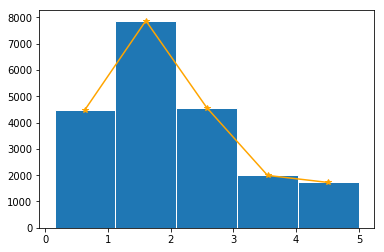

In [12]:
N, X, _ = plt.hist(train_df['target'], bins=5, ec='w') # 'ec' (edgecolors) for outline
X = 0.5*(X[1:]+ X[:-1])
_ = plt.plot(X, N, '-*', color='orange')

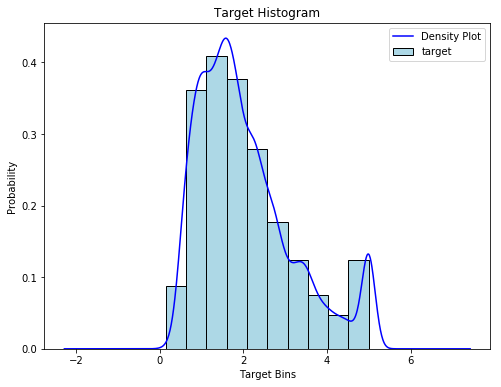

In [15]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6))

train_df['target'].plot.kde(label="Density Plot", color='b') # Or you can use gaussian_kde from scipy.stats as given here: https://realpython.com/python-histograms/
_ = plt.hist(train_df['target'], bins=10, color='lightblue', label='target', density=True, ec='black')
plt.legend()
plt.title("Target Histogram")
plt.xlabel("Target Bins")
plt.ylabel("Probability");

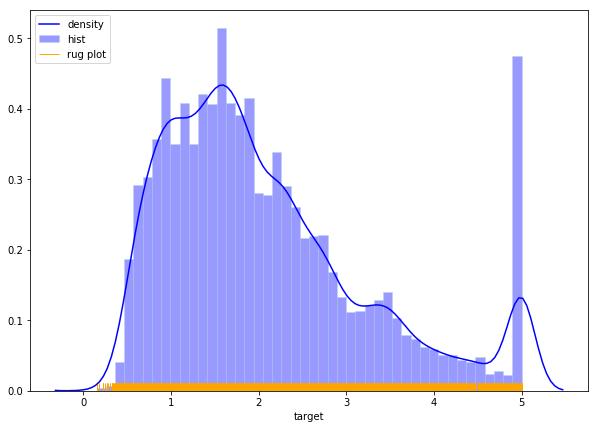

In [16]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

_ = sns.distplot(train_df['target'], rug=True, hist_kws={'ec':'lightblue', 'color':'blue', 'label':'hist'}, 
                 kde_kws={'color':'b', 'label':'density'}, rug_kws={'color':'orange', 'height':0.02, 'label': 'rug plot'})
plt.legend();

#### Making data talk:

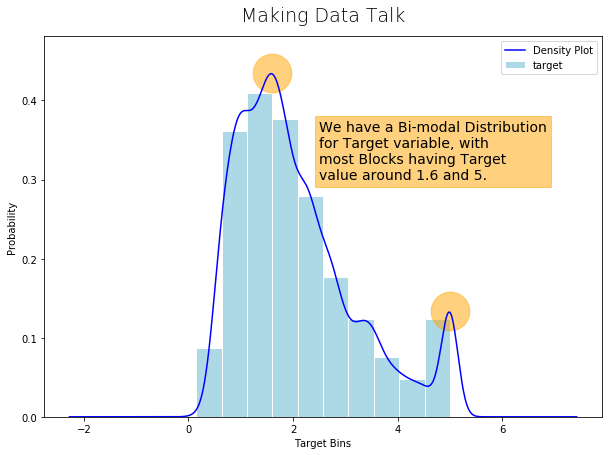

In [17]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

temp = train_df['target'].plot.kde(label="Density Plot", color='b') # Or you can use gaussian_kde from scipy.stats as given here: https://realpython.com/python-histograms/
_ = plt.hist(train_df['target'], bins=10, color='lightblue', label='target', density=True, ec='white')
plt.legend()
plt.title("Making Data Talk", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
plt.xlabel("Target Bins")
plt.ylabel("Probability")
plt.text(2.5, 0.3, "We have a Bi-modal Distribution\nfor Target variable, with\nmost Blocks having Target\nvalue around 1.6 and 5.", fontsize=14,
            bbox={'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.5, 'pad': 4})
plt.scatter([1.6, 5], [0.435, 0.134], s=1500, c='orange', alpha=0.5)

for p in _[2]:
    p.set_zorder(0)

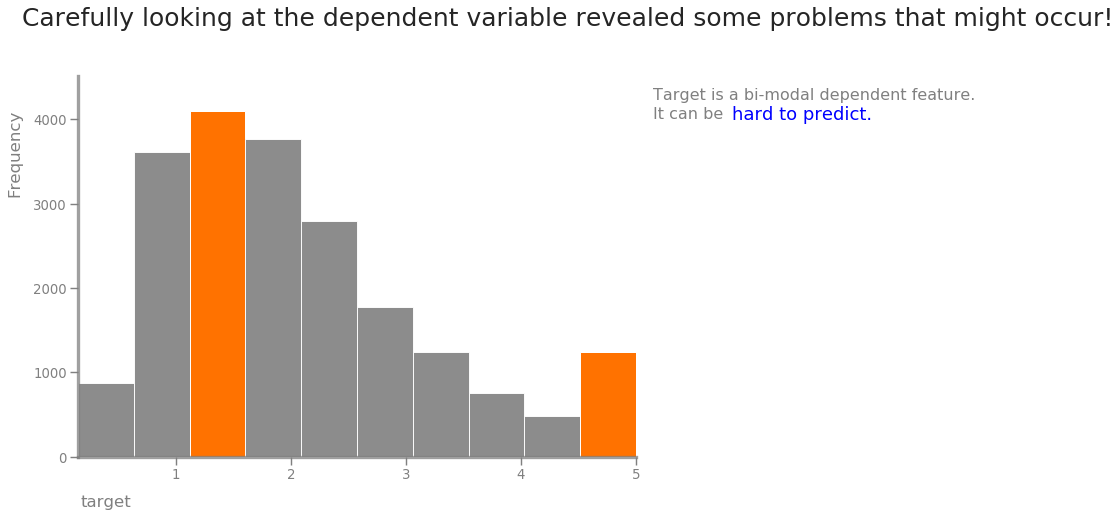

In [58]:
swm = SWMat(plt)
swm.hist(train_df['target'], bins=10, highlight=[2, 9])
swm.title("Carefully looking at the dependent variable revealed some problems that might occur!")
swm.text("Target is a bi-modal dependent feature.\nIt can be <prop fontsize='18' color='blue'> hard to predict.<\prop>",btw_text_dist=.5);

And likewise you can check distribution of multiple variables:

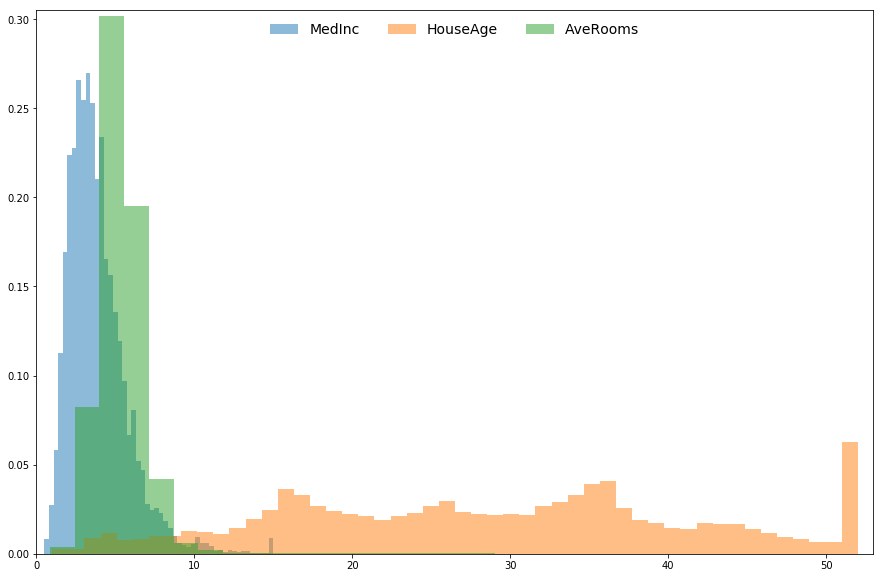

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(15, 10))

plt.hist(train_df['MedInc'], bins=50, density=True, alpha=0.5, label="MedInc")
plt.hist(train_df['HouseAge'], bins=50, density=True, alpha=0.5, label="HouseAge")
plt.hist(train_df['AveRooms'], bins=90, density=True, alpha=0.5, label="AveRooms")
plt.axis([0, 53, 0, 0.305])
plt.legend(frameon=False, loc='upper center', ncol=3, fontsize=14);

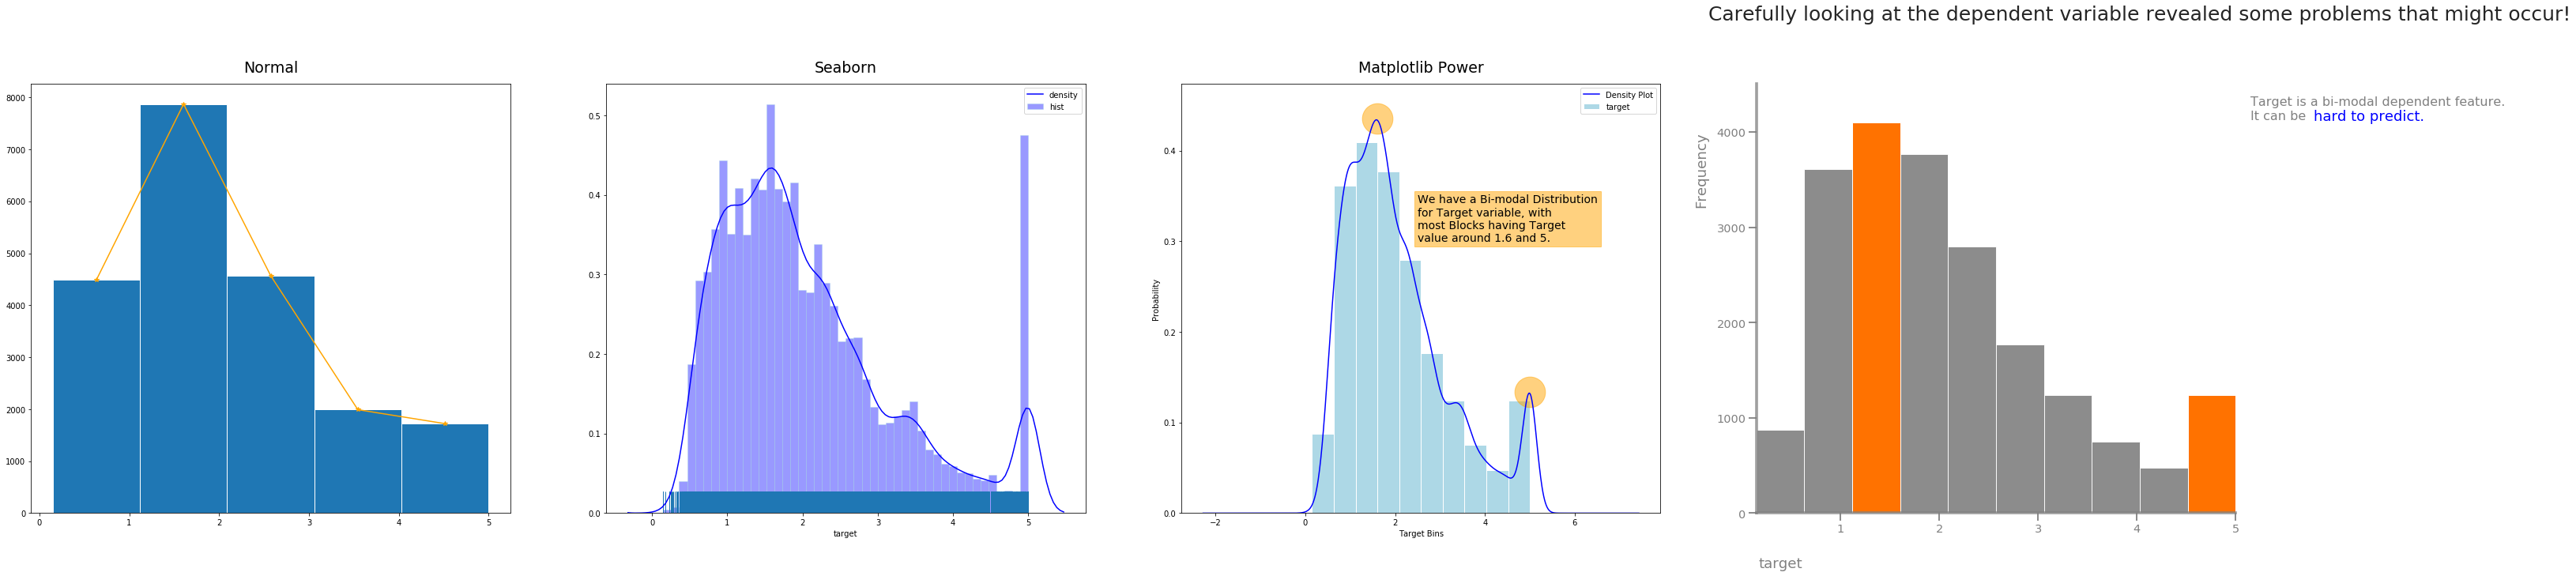

In [61]:
fig, axs = plt.subplots(1, 4, figsize=(50, 10))

N, X, _ = axs[0].hist(train_df['target'], bins=5, ec='w')
X = 0.5*(X[1:]+ X[:-1])
axs[0].plot(X, N, '-*', color='orange')
axs[0].set_title("Normal", fontdict={'fontsize': 19}, pad=15)

sns.distplot(train_df['target'], rug=True, hist_kws={'ec':'lightblue', 'color':'blue', 'label':'hist'}, 
                 kde_kws={'color':'b', 'label':'density'}, ax=axs[1])
axs[1].legend()
axs[1].set_title("Seaborn", fontdict={'fontsize': 19}, pad=15)

train_df['target'].plot.kde(label="Density Plot", color='b', ax=axs[2]) # Or you can use gaussian_kde from scipy.stats as given here: https://realpython.com/python-histograms/
ht = axs[2].hist(train_df['target'], bins=10, color='lightblue', label='target', density=True, ec='white')
axs[2].legend()
axs[2].set_title("Matplotlib Power", fontdict={'fontsize': 19}, pad=15)
axs[2].set_xlabel("Target Bins")
axs[2].set_ylabel("Probability")
axs[2].text(2.5, 0.3, "We have a Bi-modal Distribution\nfor Target variable, with\nmost Blocks having Target\nvalue around 1.6 and 5.", fontsize=14,
            bbox={'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.5, 'pad': 4})
axs[2].scatter([1.6, 5], [0.435, 0.134], s=1500, c='orange', alpha=0.5)
for p in ht[2]:
    p.set_zorder(0)
    
swm = SWMat(plt, ax=axs[3])
swm.hist(train_df['target'], bins=10, highlight=[2, 9])
swm.title("Carefully looking at the dependent variable revealed some problems that might occur!")
swm.text("Target is a bi-modal dependent feature.\nIt can be <prop fontsize='18' color='blue'> hard to predict.<\prop>",btw_text_dist=.5, btw_line_dist=.7);

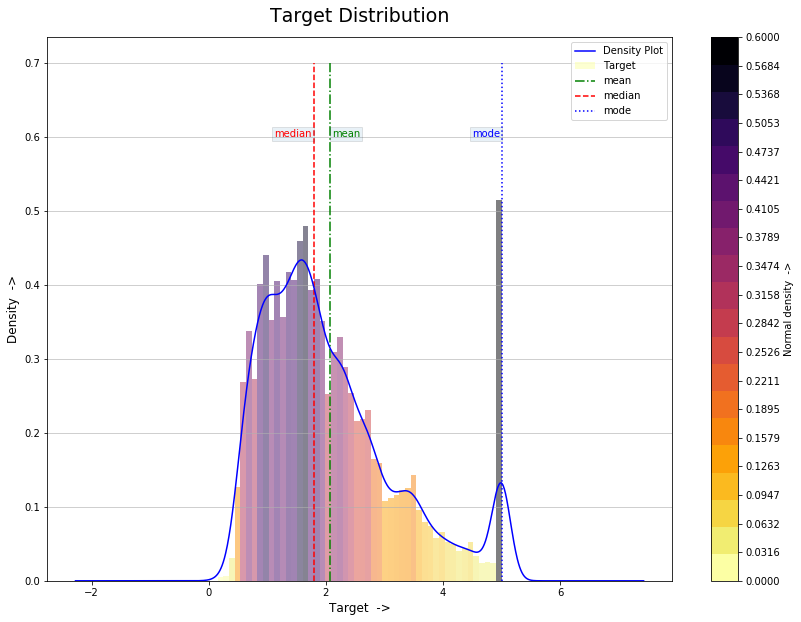

In [20]:
from matplotlib.pyplot import figure
figure(figsize=(14, 10))

N, bins, patches = plt.hist(train_df['target'], bins=50, density=True, label="Target")
# For Density plot:
train_df['target'].plot.kde(label="Density Plot", color="b") # As we increase number of bins, our plot will look more and more like density plot

# For more on histogram with density plots look here: https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
# For Grid (for better mapping of heights)
plt.grid(axis='y', alpha=0.75)
# Add lines for mean, median and mode:
plt.vlines(x=train_df['target'].mean(), ymin=0, ymax=0.7, colors='green', linestyle='dashdot', label='mean')
plt.vlines(x=train_df['target'].median(), ymin=0, ymax=0.7, colors='red', linestyle='dashed', label='median')
plt.vlines(x=train_df['target'].mode(), ymin=0, ymax=0.7, colors='blue', linestyle='dotted', label='mode')
# Add text for lines above: (https://predictablynoisy.com/matplotlib/tutorials/text/text_intro.html)
plt.text(x=train_df['target'].mean()+0.03, y=0.6, s='mean', color='green', bbox={'alpha': 0.1, 'pad': 2})
plt.text(train_df['target'].median()-0.68, 0.6, 'median', color='red', bbox={'alpha': 0.1, 'pad': 2})
plt.text(train_df['target'].mode()-0.5, 0.6, 'mode', color='blue', bbox={'alpha': 0.1, 'pad': 2})

################################## For colored bins #######################################
# You can ignore this, but using this way you can map your data to a color palette.
from matplotlib import colors
norm = colors.Normalize(N.min(), N.max()) # For mapping whole range values to a colorbar.

for freq, thispatch in zip(N, patches):
    color = plt.cm.inferno_r(norm(freq), alpha=0.85) # Pick a color from a palette (here, inferno_r) based on a value between [0, 1]
    thispatch.set_facecolor(color) # set color of current patch
    thispatch.set_alpha(0.5)
# From here: https://matplotlib.org/gallery/statistics/hist.html
##################################     End (1)     ########################################

plt.legend()
plt.xlabel("Target  ->", fontdict={'fontsize': 12,'fontweight': 5})
plt.ylabel("Density  ->", fontdict={'fontsize': 12,'fontweight': 5})
plt.title("Target Distribution", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)

## Adding colorbar: (you can ignore this too)
# Form here: https://stackoverflow.com/questions/43805821/matplotlib-add-colorbar-to-non-mappable-object
import matplotlib as mpl
cmap = plt.get_cmap('inferno_r', 20)
norm = mpl.colors.Normalize(vmin=0,vmax=0.6)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm) # colorbar needs a Mappable. Contour, Scatter and hist2d gives them by default. There you can simply call plt.colorbar()
sm.set_array([])
cb = plt.colorbar(sm, ticks=np.linspace(0,0.6,20))
cb.set_label("Normal density  ->");

# 3) Relational Plots

## a) Line Plot (+ Scatter):

### Line Plot:

There are only two variables whose relationship is nearly linear. And they are "AveRooms" and "AveBedrms". And it is obvious.

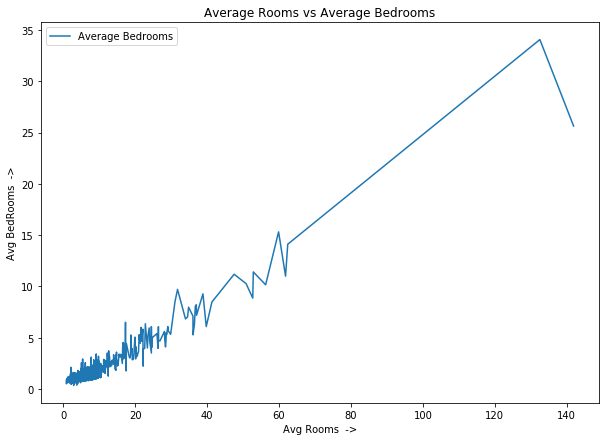

In [131]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.plot('AveRooms', 'AveBedrms', data=train_df.sort_values('AveRooms'), label="Average Bedrooms")

plt.legend()
plt.title("Average Rooms vs Average Bedrooms")
plt.xlabel("Avg Rooms  ->")
plt.ylabel("Avg BedRooms  ->");

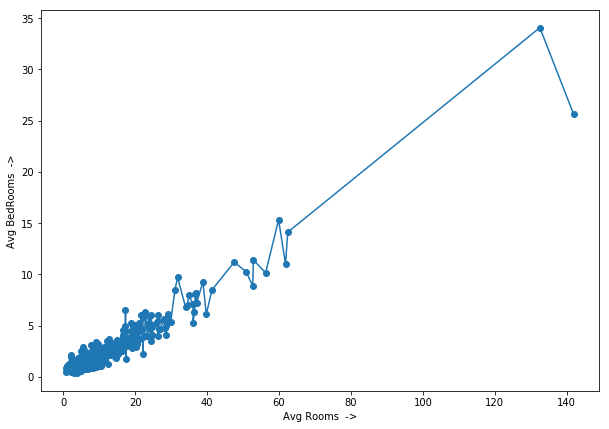

In [114]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.scatter('AveRooms', 'AveBedrms', data=train_df)
plt.plot('AveRooms', 'AveBedrms', data=train_df.sort_values('AveRooms'))

plt.xlabel("Avg Rooms  ->")
plt.ylabel("Avg BedRooms  ->");

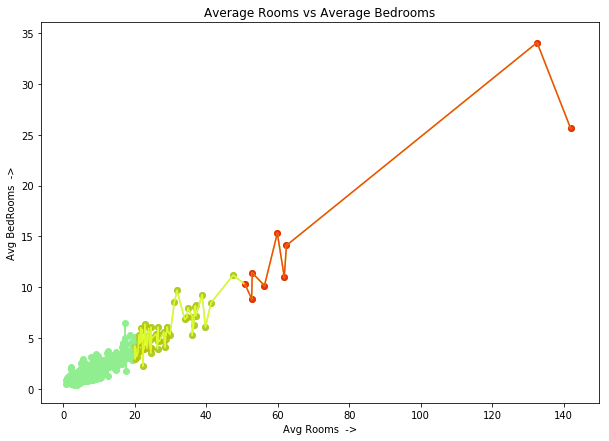

In [138]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

sorted_df = train_df.sort_values('AveRooms')

plt.scatter('AveRooms', 'AveBedrms', data=train_df, c='lightgreen')
plt.scatter('AveRooms', 'AveBedrms', data=train_df[(train_df['AveRooms']>20)], c='y', alpha=0.7)
plt.scatter('AveRooms', 'AveBedrms', data=train_df[(train_df['AveRooms']>50)], c='r', alpha=0.7)
plt.plot('AveRooms', 'AveBedrms', data=sorted_df, c='lightgreen')
plt.plot('AveRooms', 'AveBedrms', data=sorted_df[(sorted_df['AveRooms']>20)], c='yellow', alpha=0.7)
plt.plot('AveRooms', 'AveBedrms', data=sorted_df[(sorted_df['AveRooms']>50)], c='red', alpha=0.7)


plt.title("Average Rooms vs Average Bedrooms")
plt.xlabel("Avg Rooms  ->")
plt.ylabel("Avg BedRooms  ->");

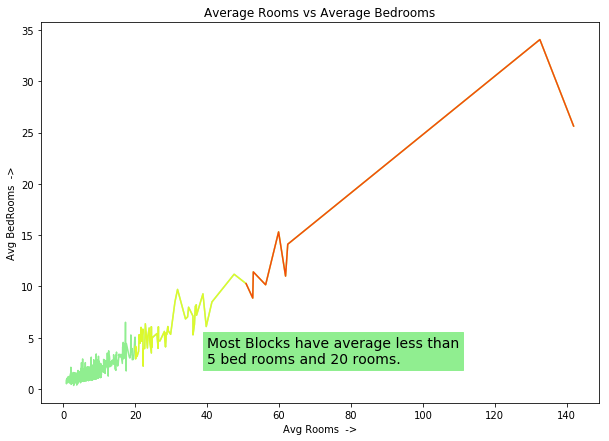

In [144]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

sorted_df = train_df.sort_values('AveRooms')

plt.plot('AveRooms', 'AveBedrms', data=sorted_df, c='lightgreen')
plt.plot('AveRooms', 'AveBedrms', data=sorted_df[(sorted_df['AveRooms']>20)], c='yellow', alpha=0.7)
plt.plot('AveRooms', 'AveBedrms', data=sorted_df[(sorted_df['AveRooms']>50)], c='red', alpha=0.7)

# Adding text:
plt.text(40, 2.5, "Most Blocks have average less than\n5 bed rooms and 20 rooms.", fontsize=14,
        bbox={'facecolor': 'lightgreen', 'edgecolor': 'lightgreen', 'pad': 4})

plt.title("Average Rooms vs Average Bedrooms")
plt.xlabel("Avg Rooms  ->")
plt.ylabel("Avg BedRooms  ->");

### Making Data Talk:

In [12]:
sorted_df = train_df.sort_values('AveRooms', na_position='first').reset_index(drop=True) # reset is necessary, otherwise original Series will be passed.

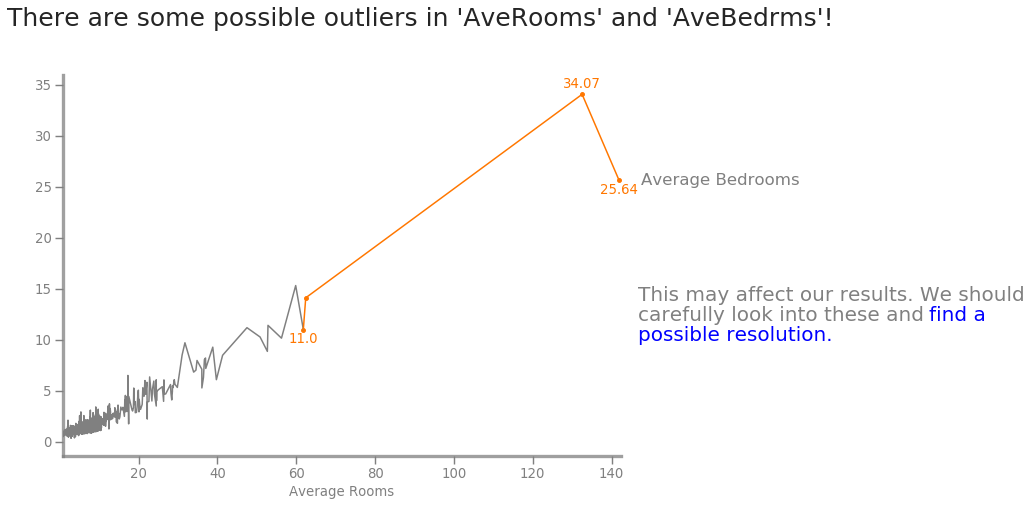

In [16]:
swm = SWMat(plt)

swm.line_plot(sorted_df['AveRooms'], sorted_df['AveBedrms'], line_labels=["Average Bedrooms"], highlight=0, 
              label_points_after=60, xlabel="Average Rooms", highlight_label_region_only=True, point_label_dist=0.9)
swm.title("There are some possible outliers in 'AveRooms' and 'AveBedrms'!", ttype="title+")
swm.text("This may affect our results. We should\ncarefully look into these and <prop color='blue'>find a\n possible resolution.<\prop>", 
         position="out-mid-right", fontsize=20, btw_line_dist=2.5, btw_text_dist=2);

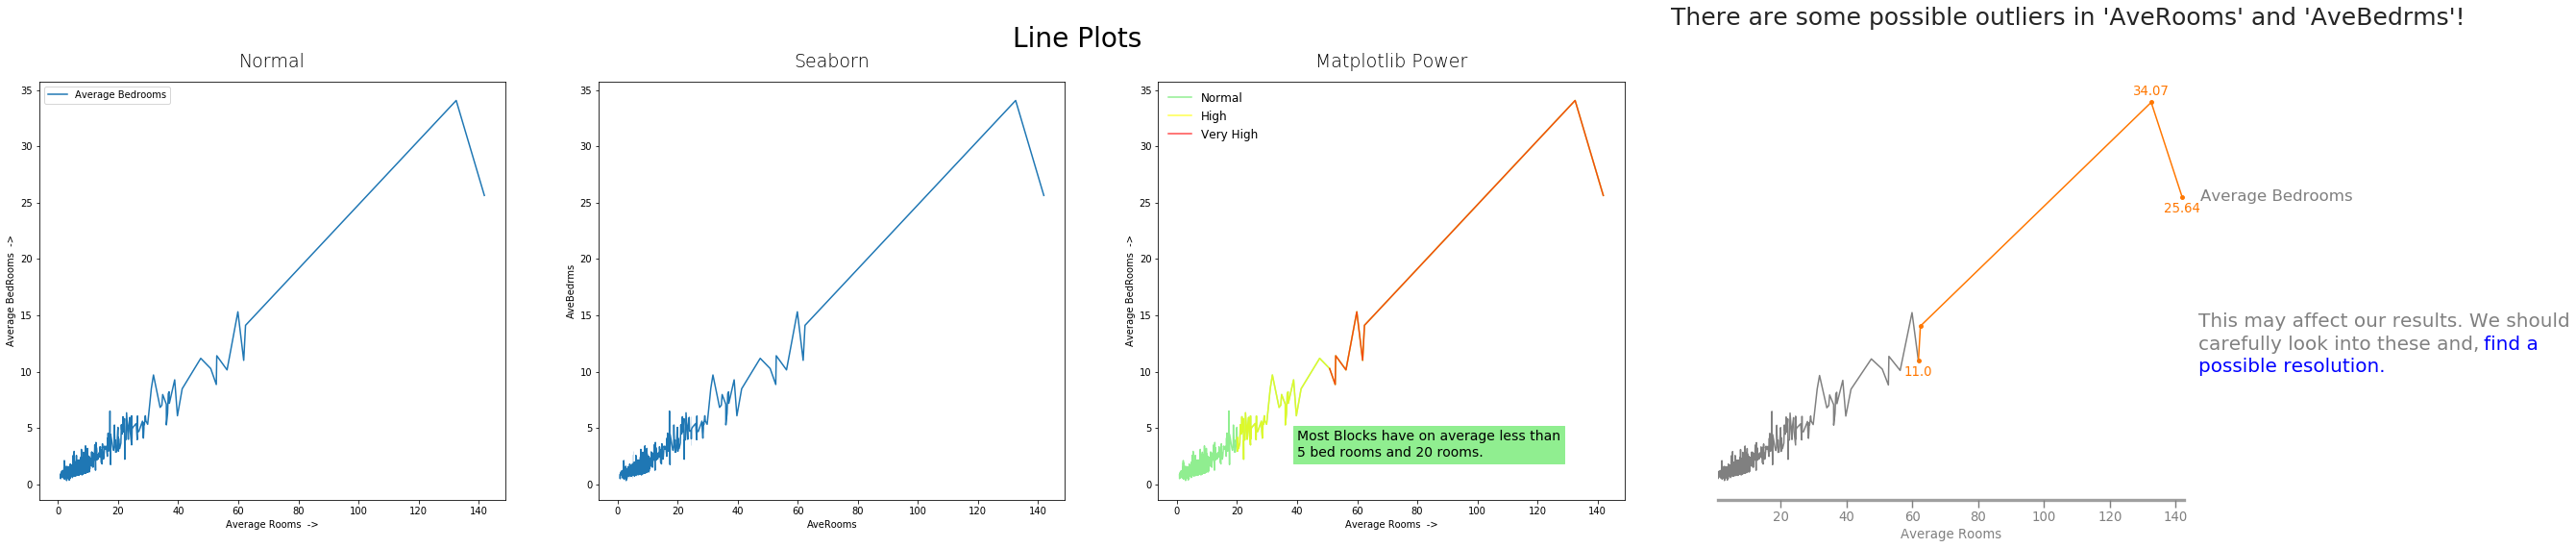

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(40, 8))
fig.suptitle("Line Plots", fontsize=28)

axs[0].plot('AveRooms', 'AveBedrms', data=train_df.sort_values('AveRooms'), label="Average Bedrooms")
axs[0].legend()
axs[0].set_title("Normal", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
axs[0].set_xlabel("Average Rooms  ->")
axs[0].set_ylabel("Average BedRooms  ->")

sns.lineplot(x='AveRooms', y='AveBedrms', data=train_df, ax=axs[1])
axs[1].set_title("Seaborn", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)

a = axs[2].plot('AveRooms', 'AveBedrms', data=sorted_df, c='lightgreen', label = "Normal")
b = axs[2].plot('AveRooms', 'AveBedrms', data=sorted_df[(sorted_df['AveRooms']>20)], c='yellow', alpha=0.7, label="High")
c = axs[2].plot('AveRooms', 'AveBedrms', data=sorted_df[(sorted_df['AveRooms']>50)], c='red', alpha=0.7, label="Very High")
axs[2].set_title("Matplotlib Power", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
########################### Adding manual legends ########################################
axs[2].legend(handles=[a[0], b[0], c[0]], ncol=1, frameon=False, fontsize='large')
##########################################################################################
axs[2].text(40, 2.5, "Most Blocks have on average less than\n5 bed rooms and 20 rooms.", fontsize=14,
        bbox={'facecolor': 'lightgreen', 'edgecolor': 'lightgreen', 'pad': 4})
axs[2].set_xlabel("Average Rooms  ->")
axs[2].set_ylabel("Average BedRooms  ->")

swm = SWMat(plt, ax=axs[3])

swm.line_plot(sorted_df['AveRooms'], sorted_df['AveBedrms'], line_labels=["Average Bedrooms"], highlight=0, label_points_after=60,
            xlabel="Average Rooms", highlight_label_region_only=True, point_label_dist=0.9, hide_y=True)
swm.title("There are some possible outliers in 'AveRooms' and 'AveBedrms'!", ttype="title+")
swm.text("This may affect our results. We should\ncarefully look into these and, <prop color='blue'>find a\n possible resolution.<\prop>", 
         position="out-mid-right", fontsize=20, btw_line_dist=2.5, btw_text_dist=2);

But this doesn't look that good. What can we do?

### Scatter Plot (1):

In [12]:
# For fitting a linear line:
from numpy.polynomial.polynomial import polyfit

const, slope = polyfit(train_df['AveRooms'], train_df['AveBedrms'], deg=1)
Y = train_df['AveRooms']*slope + const

For more info look [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html).

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.scatter('AveRooms', 'AveBedrms', data=train_df.sort_values('AveRooms'), edgecolors='w', linewidths=0.1)

plt.legend()
plt.title("Scatter Plot of Average Rooms and Average Bedrooms")
plt.xlabel("Average Bedrooms  ->")
plt.ylabel("Average Rooms  ->");

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.scatter('AveRooms', 'AveBedrms', data=train_df.sort_values('AveRooms'), edgecolors='w', linewidth=0.2)
plt.plot(train_df['AveRooms'], Y, linewidth=1, color='red', linestyle='-', alpha=0.8)

plt.xlabel("Avg Rooms  ->")
plt.ylabel("Avg BedRooms  ->")

# Adding annotations:
plt.annotate("Possible outliers", xy=(144, 31), xytext=(160, 34),
             arrowprops={'arrowstyle':'-[,widthB=4.0', 'color': 'black'},
             bbox={'pad':4, 'edgecolor':'orange', 'facecolor':'orange', 'alpha':0.4})

plt.annotate("Regression Line", xy=(80, 12), xytext=(120, 3),
             arrowprops={'arrowstyle':'->', 'color': 'black', "connectionstyle":"arc3,rad=-0.2"},
             bbox={'pad':4, 'edgecolor':'orange', 'facecolor':'orange', 'alpha':0.4})
plt.show()

We can also add confidence interval region for our regression line. We can get confidence interval for our regression like using sklearn's GaussianProcess method. (look [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.03-errorbars.html))

In [ ]:
sample = train_df.sample(frac=0.5) # Gaussian Process taking too much memory...

In [23]:
from sklearn.gaussian_process import GaussianProcessRegressor

gp = GaussianProcessRegressor()

In [25]:
%%time

print("Fitting...")
gp.fit(sample['AveRooms'].values.reshape(-1, 1), sample['AveBedrms'].values)
print("Fitting Complete.")

print("Predicting...")
x = np.linspace(0, 145, 146)
preds, std = gp.predict(x.reshape(-1, 1), return_std=True)
print("Predicted.")

# For 95% confidence interval:
delta = 1.96*std

Fitting...
Fitting Complete.
Predicting...
Predicted.
Wall time: 8min 44s


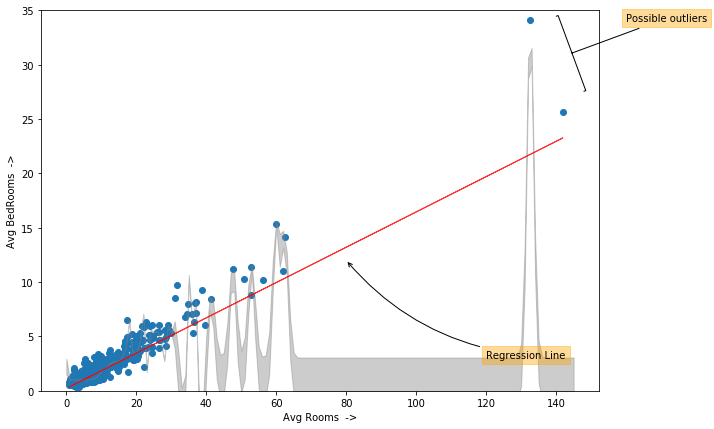

In [26]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.scatter('AveRooms', 'AveBedrms', data=train_df.sort_values('AveRooms'))#, edgecolors='w')
plt.plot(train_df['AveRooms'], Y, linewidth=1, color='red', linestyle='-', alpha=0.8)

plt.xlabel("Avg Rooms  ->")
plt.ylabel("Avg BedRooms  ->")

# Adding annotations:
plt.annotate("Possible outliers", xy=(144, 31), xytext=(160, 34),
             arrowprops={'arrowstyle':'-[,widthB=4.0', 'color': 'black'},
             bbox={'pad':4, 'edgecolor':'orange', 'facecolor':'orange', 'alpha':0.4})

plt.annotate("Regression Line", xy=(80, 12), xytext=(120, 3),
             arrowprops={'arrowstyle':'->', 'color': 'black', "connectionstyle":"arc3,rad=-0.2"},
             bbox={'pad':4, 'edgecolor':'orange', 'facecolor':'orange', 'alpha':0.4})

# For confidence interval:
plt.fill_between(x, preds-delta, preds+delta, color='gray', alpha=0.4)
plt.ylim(0, 35);

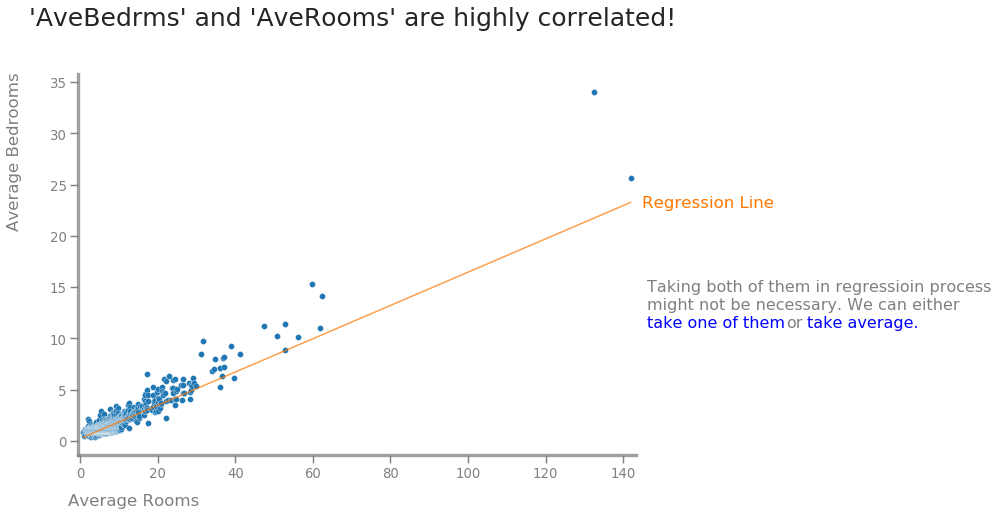

In [18]:
swm = SWMat(plt)
plt.scatter('AveRooms', 'AveBedrms', data=train_df.sort_values('AveRooms'), edgecolors='w', linewidths=0.3)
swm.line_plot(train_df['AveRooms'], Y, highlight=0, alpha=0.7, line_labels=["Regression Line"])
swm.title("'AveBedrms' and 'AveRooms' are highly correlated!", ttype="title+")
swm.text("Taking both of them in regressioin process\nmight not be necessary. We can either\n<prop color='blue'>take one of them</prop> or <prop color='blue'>take average.</prop>",
         position='out-mid-right', btw_line_dist=5)
swm.axis(labels=["Average Rooms", "Average Bedrooms"])

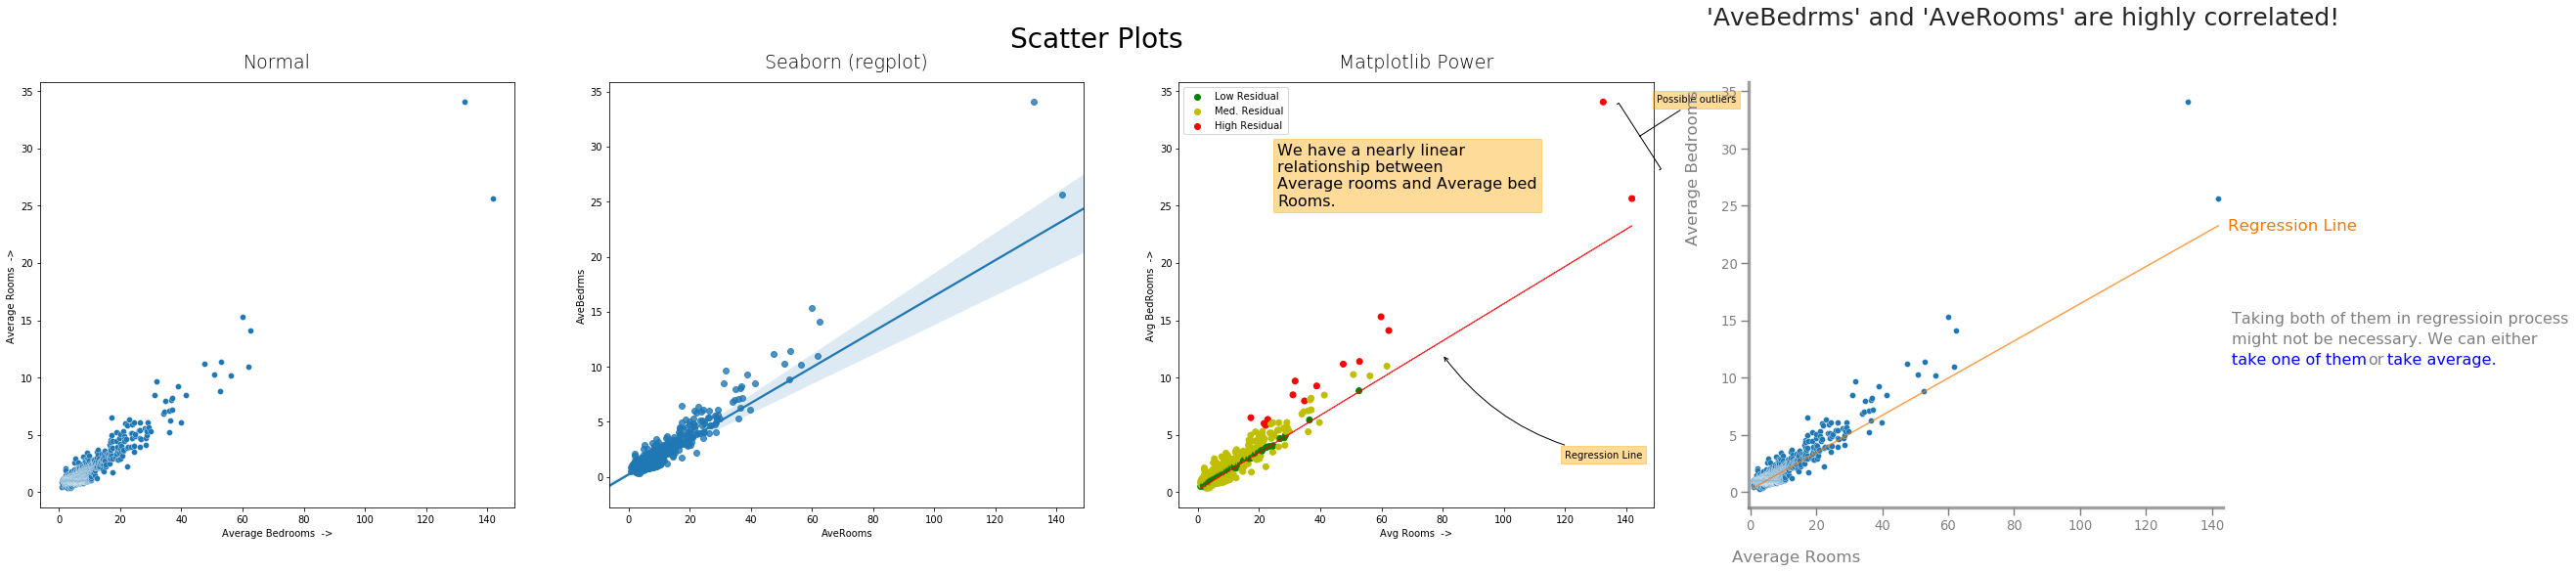

In [19]:
fig, axs = plt.subplots(1, 4, figsize=(40, 8))
fig.suptitle("Scatter Plots", fontsize=28)

axs[0].scatter('AveRooms', 'AveBedrms', data=train_df.sort_values('AveRooms'), edgecolors='w', linewidths=0.3)
axs[0].set_title("Normal", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
axs[0].set_xlabel("Average Bedrooms  ->")
axs[0].set_ylabel("Average Rooms  ->")

sns.regplot(x='AveRooms', y='AveBedrms', data=train_df, label="Average Bedrooms", ax=axs[1])
axs[1].set_title("Seaborn (regplot)", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)

##################### For colors in scatter plot #################################
diff = (train_df['AveBedrms'] - Y).abs()
colors = []
for i in range(len(diff)):
  if diff[i] <= 0.17: colors.append('g')
  elif diff[i] > 0.17 and diff[i] <= 2: colors.append('y')
  else: colors.append('r')
train_df['colors'] = colors
sorted_df = train_df.sort_values('AveRooms')
##################################################################################
sct = axs[2].scatter('AveRooms', 'AveBedrms', data=sorted_df, c=sorted_df['colors'])
del train_df['colors']
axs[2].plot(train_df['AveRooms'], Y, linewidth=1, color='red', linestyle='-', alpha=0.8)
axs[2].set_title("Matplotlib Power", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
axs[2].set_xlabel("Avg Rooms  ->")
axs[2].set_ylabel("Avg BedRooms  ->")
###################### Setting legend manually ###################################
one = axs[2].scatter([], [], c='g', label='Low Residual')
two = axs[2].scatter([], [], c='y', label='Med. Residual')
three = axs[2].scatter([], [], c='r', label='High Residual')
axs[2].legend(handles=[one, two, three],)
##################################################################################
# Adding annotations:
axs[2].annotate("Possible outliers", xy=(144, 31), xytext=(150, 34),
             arrowprops={'arrowstyle':'-[,widthB=4.0', 'color': 'black'},
             bbox={'pad':4, 'edgecolor':'orange', 'facecolor':'orange', 'alpha':0.4})
axs[2].annotate("Regression Line", xy=(80, 12), xytext=(120, 3),
             arrowprops={'arrowstyle':'->', 'color': 'black', "connectionstyle":"arc3,rad=-0.2"},
             bbox={'pad':4, 'edgecolor':'orange', 'facecolor':'orange', 'alpha':0.4})
axs[2].text(26, 25, "We have a nearly linear\nrelationship between\nAverage rooms and Average bed\nRooms.", fontsize=16,
           bbox={'facecolor': 'orange', 'edgecolor': 'orange', 'pad': 4, 'alpha': 0.4});


swm = SWMat(plt, ax=axs[3])
axs[3].scatter('AveRooms', 'AveBedrms', data=train_df.sort_values('AveRooms'), edgecolors='w', linewidths=0.3)
swm.line_plot(train_df['AveRooms'], Y, highlight=0, alpha=0.7, line_labels=["Regression Line"])
swm.title("'AveBedrms' and 'AveRooms' are highly correlated!", ttype="title+")
swm.text("Taking both of them in regressioin process\nmight not be necessary. We can either\n<prop color='blue'>take one of them</prop> or <prop color='blue'>take average.</prop>",
         position='out-mid-right', btw_line_dist=5)
swm.axis(labels=["Average Rooms", "Average Bedrooms"])

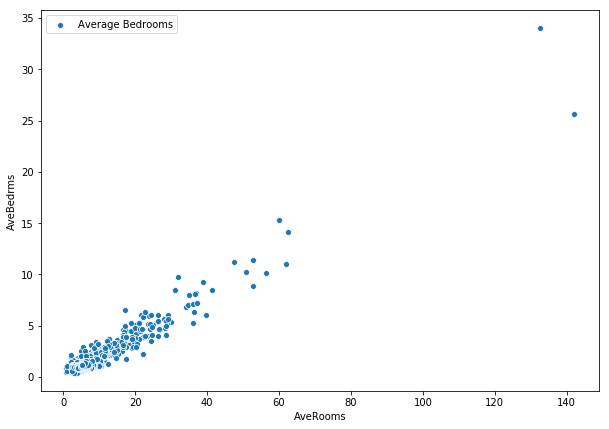

In [160]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

#sns.lineplot(x='AveRooms', y='AveBedrms', data=train_df)
sns.scatterplot(x='AveRooms', y='AveBedrms', data=train_df, label="Average Bedrooms");

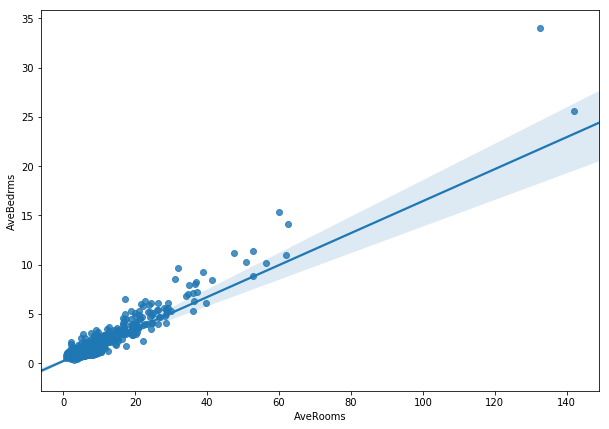

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

sns.regplot('AveRooms', 'AveBedrms', data=train_df);

In [ ]:
train_df['target_int'] = train_df['target']
train_df.loc[(train_df['target'] < 1), 'target_int'] = 0
train_df.loc[(train_df['target'] >= 1) & (train_df['target'] < 2), 'target_int'] = 1
train_df.loc[(train_df['target'] >= 2) & (train_df['target'] < 3), 'target_int'] = 2
train_df.loc[(train_df['target'] >=3) & (train_df['target'] < 4), 'target_int'] = 3
train_df.loc[(train_df['target'] >= 4), 'target_int'] = 4

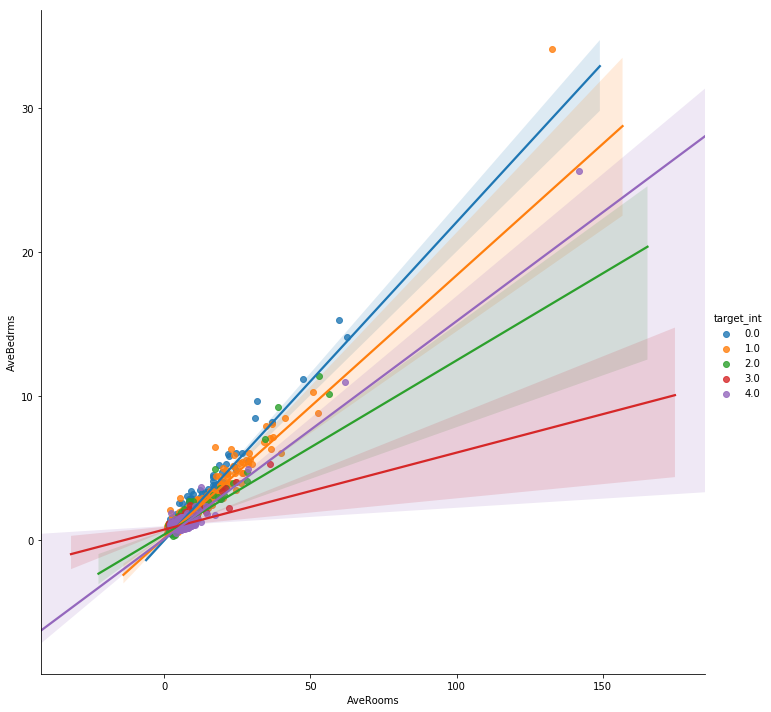

In [ ]:
sns.lmplot('AveRooms', 'AveBedrms', hue='target_int', data=train_df, height=10); # There are many options available here, like row, col etc. You should look into them.

In [ ]:
del train_df['target_int']

## b) Scatter Plot:

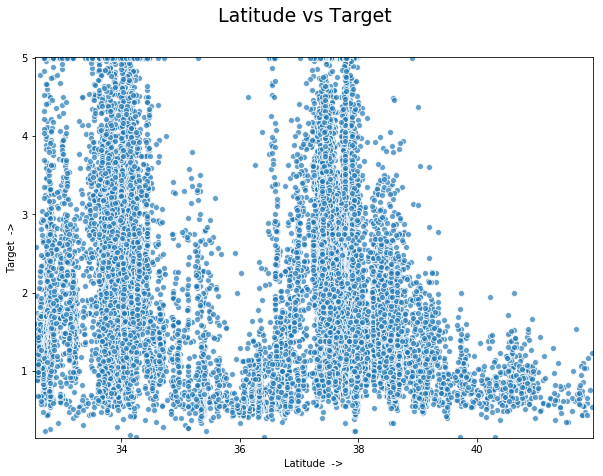

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))


plt.scatter('Latitude', 'target', data=train_df, edgecolors='w', alpha=0.7)

plt.margins(0)
plt.suptitle("Latitude vs Target", fontsize=19, fontweight=0.5)
plt.xlabel('Latitude  ->')
plt.ylabel('Target  ->');

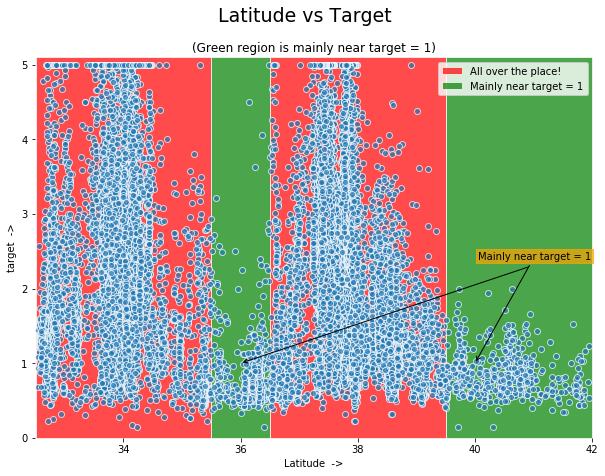

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

# For filling regions:
plt.fill_betweenx([0, 5.1], x1=32.5, x2=35.5, facecolor='red', alpha=0.7, edgecolor='w')
plt.fill_betweenx([0, 5.1], x1=35.5, x2=36.5, facecolor='green', alpha=0.7, edgecolor='w')
plt.fill_betweenx([0, 5.1], x1=36.5, x2=39.5, facecolor='red', alpha=0.7, edgecolor='w',)
plt.fill_betweenx([0, 5.1], x1=39.5, x2=42, facecolor='green', alpha=0.7, edgecolor='w')

# Arrow message:
plt.annotate("Mainly near target = 1", xy=(40, 1), xytext=(40.05, 2.5),
            arrowprops=dict(arrowstyle='->', facecolor='black'),
            verticalalignment='top', bbox={'facecolor':'orange', 'alpha':0.7, 'pad':2, 'edgecolor': 'orange'})
plt.annotate("", xy=(36, 1), xytext=(40.95, 2.3),
            arrowprops=dict(arrowstyle='->', facecolor='black'))

plt.scatter('Latitude', 'target', data=train_df, edgecolors='w', alpha=0.7)

plt.box(False)
plt.margins(0)
plt.legend(['All over the place!', 'Mainly near target = 1'])
plt.suptitle("Latitude vs Target", fontsize=19, fontweight=0.5)
plt.title("(Green region is mainly near target = 1)", pad=6)
plt.xlabel('Latitude  ->')
plt.ylabel('target  ->');

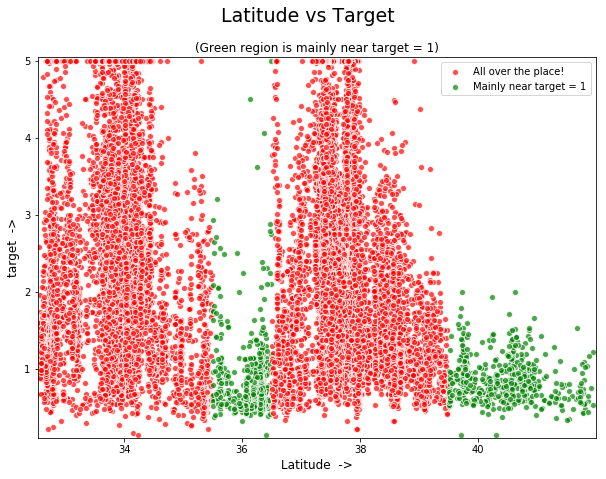

In [ ]:
# Or you could have done something like this:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

# Arrow message:
#plt.annotate("Mainly near target = 1", xy=(40, 1), xytext=(40.05, 2.5),
#            arrowprops=dict(arrowstyle='->', facecolor='black'),
#            verticalalignment='top', bbox={'facecolor':'orange', 'alpha':0.7, 'pad':2, 'edgecolor': 'orange'})
#plt.annotate("", xy=(36, 1), xytext=(40.95, 2.3),
#            arrowprops=dict(arrowstyle='->', facecolor='black'))

plt.scatter(train_df.loc[(train_df['Latitude']<35.5), 'Latitude'], train_df.loc[(train_df['Latitude']<35.5), 'target'], edgecolors='w', alpha=0.7, c='red')
plt.scatter(train_df.loc[(train_df['Latitude']>=35.5) & (train_df['Latitude']<36.5), 'Latitude'], 
            train_df.loc[(train_df['Latitude']>=35.5) & (train_df['Latitude']<36.5), 'target'], 
            edgecolors='w', alpha=0.7, c='green')
plt.scatter(train_df.loc[(train_df['Latitude']>=36.5) & (train_df['Latitude']<39.5), 'Latitude'], 
            train_df.loc[(train_df['Latitude']>=36.5) & (train_df['Latitude']<39.5), 'target'], 
            edgecolors='w', alpha=0.7, c='red')
plt.scatter(train_df.loc[(train_df['Latitude']>39.5), 'Latitude'], train_df.loc[(train_df['Latitude']>39.5), 'target'], edgecolors='w', alpha=0.7, c='green')

plt.margins(0)
plt.legend(['All over the place!', 'Mainly near target = 1'])
plt.suptitle("Latitude vs Target", fontsize=19, fontweight=0.5)
plt.title("(Green region is mainly near target = 1)", pad=6)
plt.xlabel('Latitude  ->', fontsize=12)
plt.ylabel('target  ->', fontsize=12);

We can do the same with Latitude vs Longitude:

Here we will use the first one because that is more clear, I think.

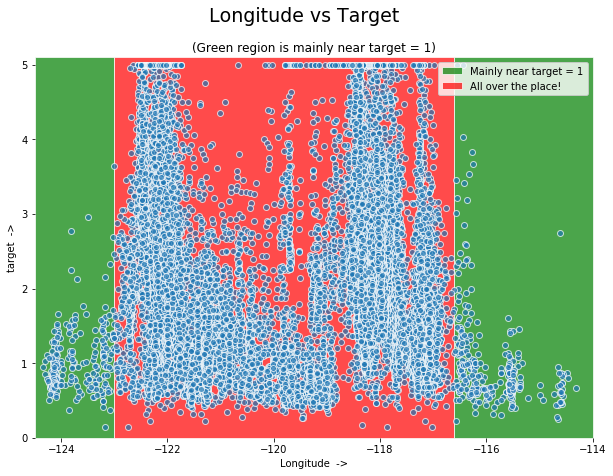

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

# For filling regions:
plt.fill_betweenx([0, 5.1], x1=-124.5, x2=-123, facecolor='green', alpha=0.7, edgecolor='w')
plt.fill_betweenx([0, 5.1], x1=-123, x2=-116.6, facecolor='red', alpha=0.7, edgecolor='w')
#plt.fill_betweenx([0, 5.1], x1=-121.5, x2=-120, facecolor='green', alpha=0.7, edgecolor='w')
#plt.fill_betweenx([0, 5.1], x1=-120, x2=-116.6, facecolor='red', alpha=0.7, edgecolor='w')
plt.fill_betweenx([0, 5.1], x1=-116.6, x2=-114, facecolor='green', alpha=0.7, edgecolor='w')

# Arrow message:
#plt.annotate("Mainly near target = 1", xy=(40, 1), xytext=(40.05, 2.5),
#            arrowprops=dict(arrowstyle='->', facecolor='black'),
#            verticalalignment='top', bbox={'facecolor':'orange', 'alpha':0.7, 'pad':2, 'edgecolor': 'orange'})
#plt.annotate("", xy=(36, 1), xytext=(40.95, 2.3),
#            arrowprops=dict(arrowstyle='->', facecolor='black'))

plt.scatter('Longitude', 'target', data=train_df, edgecolors='w', alpha=0.7)

plt.box(False)
plt.margins(0)
plt.legend(['Mainly near target = 1', 'All over the place!'])
plt.suptitle("Longitude vs Target", fontsize=19, fontweight=0.5)
plt.title("(Green region is mainly near target = 1)", pad=6)
plt.xlabel('Longitude  ->')
plt.ylabel('target  ->');

Because Latitude and Longitude goes hand in hand, we should look at them together, so we can plot something like this:

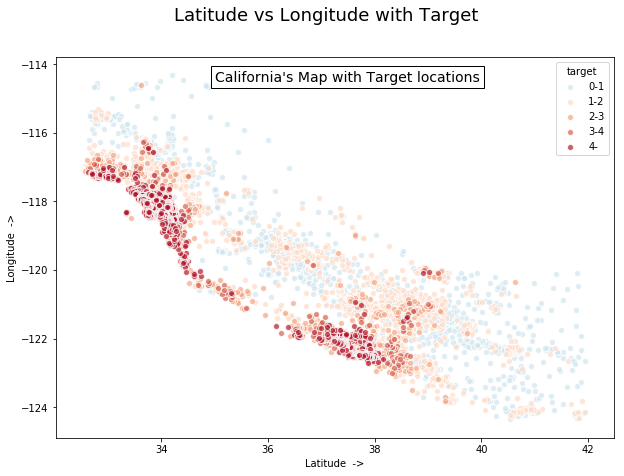

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

# Colors from RdBu palette
plt.scatter(train_df.loc[(train_df['target']<1), 'Latitude'], train_df.loc[(train_df['target']<1), 'Longitude'], c='#D1E5F0', alpha=0.7, edgecolors='w')
plt.scatter(train_df.loc[(train_df['target']>=1) & (train_df['target']<2), 'Latitude'], 
            train_df.loc[(train_df['target']>=1) & (train_df['target']<2), 'Longitude'], c='#FDDBC7', alpha=0.7, edgecolors='w')
plt.scatter(train_df.loc[(train_df['target']>=2) & (train_df['target']<3), 'Latitude'], 
            train_df.loc[(train_df['target']>=2) & (train_df['target']<3), 'Longitude'], c='#F4A582', alpha=0.7, edgecolors='w')
plt.scatter(train_df.loc[(train_df['target']>=3) & (train_df['target']<4), 'Latitude'], 
            train_df.loc[(train_df['target']>=3) & (train_df['target']<4), 'Longitude'], c='#D6604D', alpha=0.7, edgecolors='w')
plt.scatter(train_df.loc[(train_df['target']>=4), 'Latitude'], train_df.loc[(train_df['target']>=4), 'Longitude'], c='#B2182B', alpha=0.7, edgecolors='w');

# Text:
plt.text(x=35, y=-114.5, s="California's Map with Target locations", fontsize=14, bbox={'facecolor': 'white'})

plt.suptitle("Latitude vs Longitude with Target", fontsize=18)
plt.legend(["0-1", "1-2", "2-3", "3-4", "4-"], title='target')
plt.xlabel("Latitude  ->")
plt.ylabel("Longitude  ->");

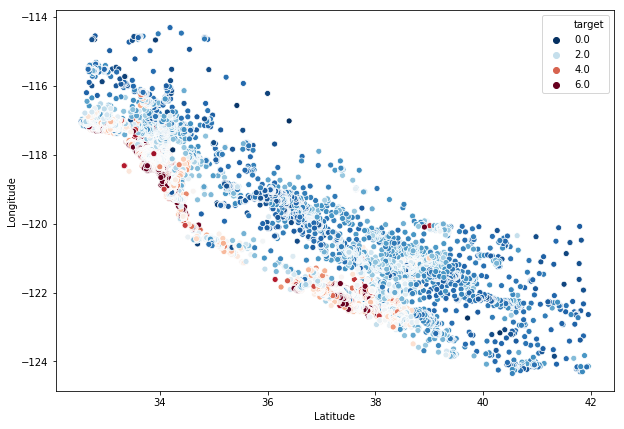

In [ ]:
# This one is easy with seaborn:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

_ = sns.scatterplot('Latitude', 'Longitude', hue='target', data=train_df, palette="RdBu_r")

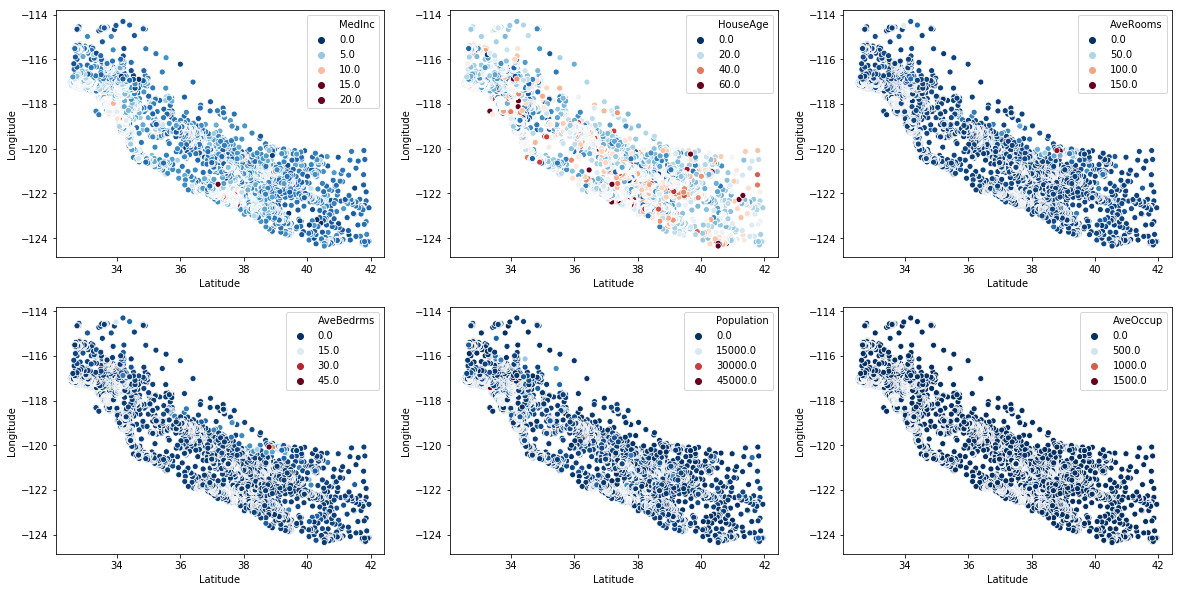

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

_ = sns.scatterplot('Latitude', 'Longitude', hue='MedInc', data=train_df, palette="RdBu_r", ax=axs[0][0])
_ = sns.scatterplot('Latitude', 'Longitude', hue='HouseAge', data=train_df, palette="RdBu_r", ax=axs[0][1])
_ = sns.scatterplot('Latitude', 'Longitude', hue='AveRooms', data=train_df, palette="RdBu_r", ax=axs[0][2])
_ = sns.scatterplot('Latitude', 'Longitude', hue='AveBedrms', data=train_df, palette="RdBu_r", ax=axs[1][0])
_ = sns.scatterplot('Latitude', 'Longitude', hue='Population', data=train_df, palette="RdBu_r", ax=axs[1][1])
_ = sns.scatterplot('Latitude', 'Longitude', hue='AveOccup', data=train_df, palette="RdBu_r", ax=axs[1][2])

## c) 2d-Hist and Contour Plots:

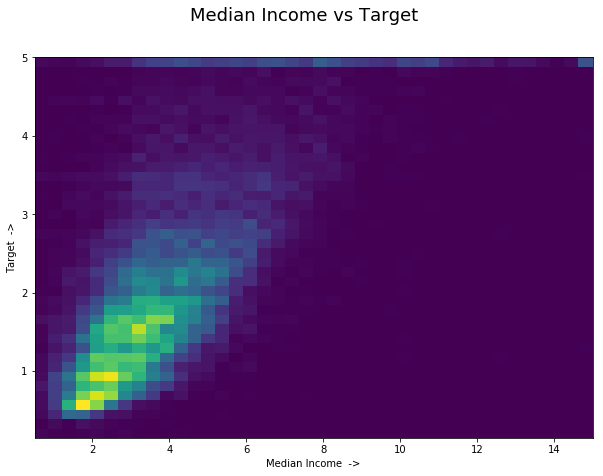

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.hist2d('MedInc', 'target', bins=40, data=train_df)
plt.xlabel('Median Income  ->')
plt.ylabel('Target  ->')
plt.suptitle("Median Income vs Target", fontsize=18);

For more cmap's you can look [here](https://matplotlib.org/users/colormaps.html).

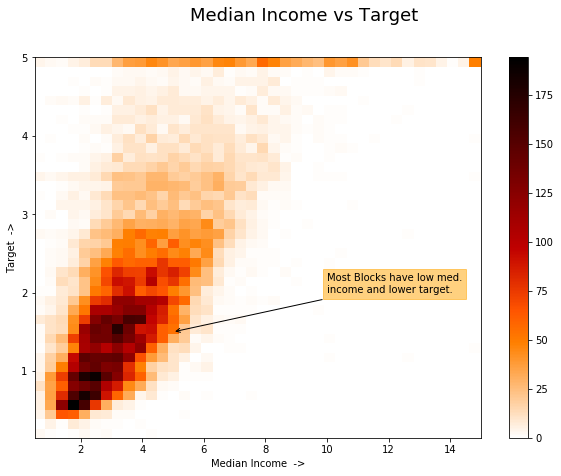

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))
 
plt.hist2d('MedInc', 'target', bins=40, data=train_df, cmap='gist_heat_r') 
plt.colorbar()
plt.xlabel('Median Income  ->')
plt.ylabel('Target  ->')
plt.suptitle("Median Income vs Target", fontsize=18)

# Adding annotations:
plt.annotate("Most Blocks have low med.\nincome and lower target.", xy=(5, 1.5), xytext=(10, 2),
             arrowprops={'arrowstyle': '->', 'color': 'k'},
             bbox={'facecolor': 'orange', 'pad':4, 'alpha': 0.5, 'edgecolor': 'orange'});

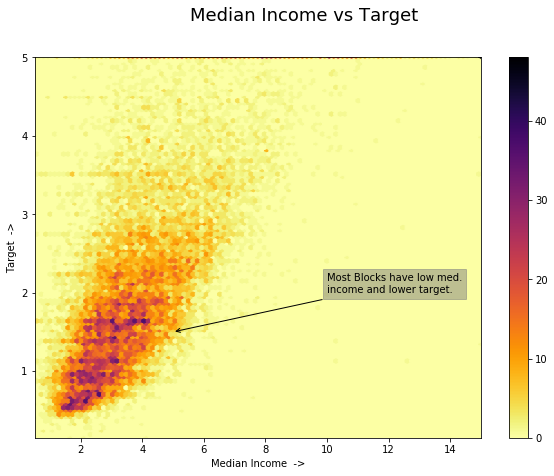

In [47]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.hexbin('MedInc', 'target', data=train_df, alpha=1.0, cmap="inferno_r")

plt.margins(0)
plt.colorbar()
plt.xlabel('Median Income  ->')
plt.ylabel('Target  ->')
plt.suptitle("Median Income vs Target", fontsize=18)

# Adding annotations:
plt.annotate("Most Blocks have low med.\nincome and lower target.", xy=(5, 1.5), xytext=(10, 2),
             arrowprops={'arrowstyle': '->', 'color': 'k'},
             bbox={'facecolor': 'gray', 'pad':4, 'alpha': 0.5, 'edgecolor': 'gray'});

#### Contour plots:

Contour plots are mainly used for visualizing a 3D or 4D **function** on 2D or 3D graph.

We don't have a function for our *target*, but we can still make a contour plot like this:

We will first make our variable's values considerable and convert them to integers, as we will be using these values as indexs in an array (which we will plot as contour).

In [ ]:
# For indexing in array(np.round) and size considerations(np.log):
medi_min = np.round(train_df['MedInc']).min()
medi_max = np.round(train_df['MedInc']).max()
pop_min = np.round(np.log(train_df['Population'])).min()
pop_max = np.round(np.log(train_df['Population'])).max()
medi_min, medi_max, pop_min, pop_max

(0.0, 15.0, 1.0, 10.0)

We are going to make a 2D array and for point in dataframe we will matrix value of that location to average of all target values for that point.

In [ ]:
Z = np.zeros((16, 10)) # (medi_max+1, pop_max)
counts = np.zeros((16, 10))

for i in range(len(train_df)):
  a = np.round(train_df.iloc[i,]['MedInc']).astype(np.int)
  b = np.round(np.log(train_df.iloc[i,]['Population'])).astype(np.int)
  Z[a][b-1] += train_df.iloc[i,]['target'] # Addding all values of *target* for this point
  counts[a][b-1] += 1 # Keeping a count of number of points for every location
  
Z = Z/counts # taking average

There are two types of contour methods available: `plt.contour()` and `plt.contourf()`. First one is for leveled contour and second one is for filled contour. We are using filled contour here.

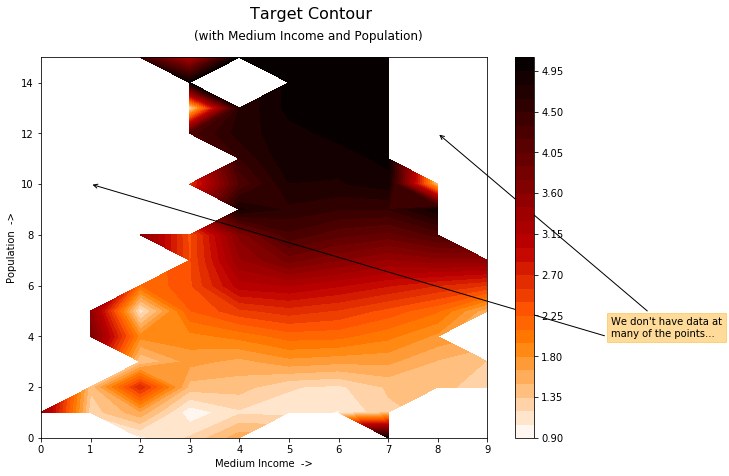

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.contourf(Z, levels=30, cmap="gist_heat_r")
plt.colorbar()

plt.suptitle("Target Contour", fontsize=16)
plt.title("(with Medium Income and Population)", position=(0.6, 1.03))
plt.xlabel("Medium Income  ->")
plt.ylabel("Population  ->")

# Adding Annotation:
plt.annotate("We don't have data at\nmany of the points...", xy=(8, 12), xytext=(11.5, 4),
             arrowprops={'arrowstyle':'->', 'color':'k'},
             bbox={'facecolor': 'orange', 'edgecolor':'orange', 'alpha': 0.4, 'pad': 4})
plt.annotate("", xy=(1, 10), xytext=(11.4, 4),
             arrowprops={'arrowstyle':'->', 'color':'k'});

## d) Pair Plot:

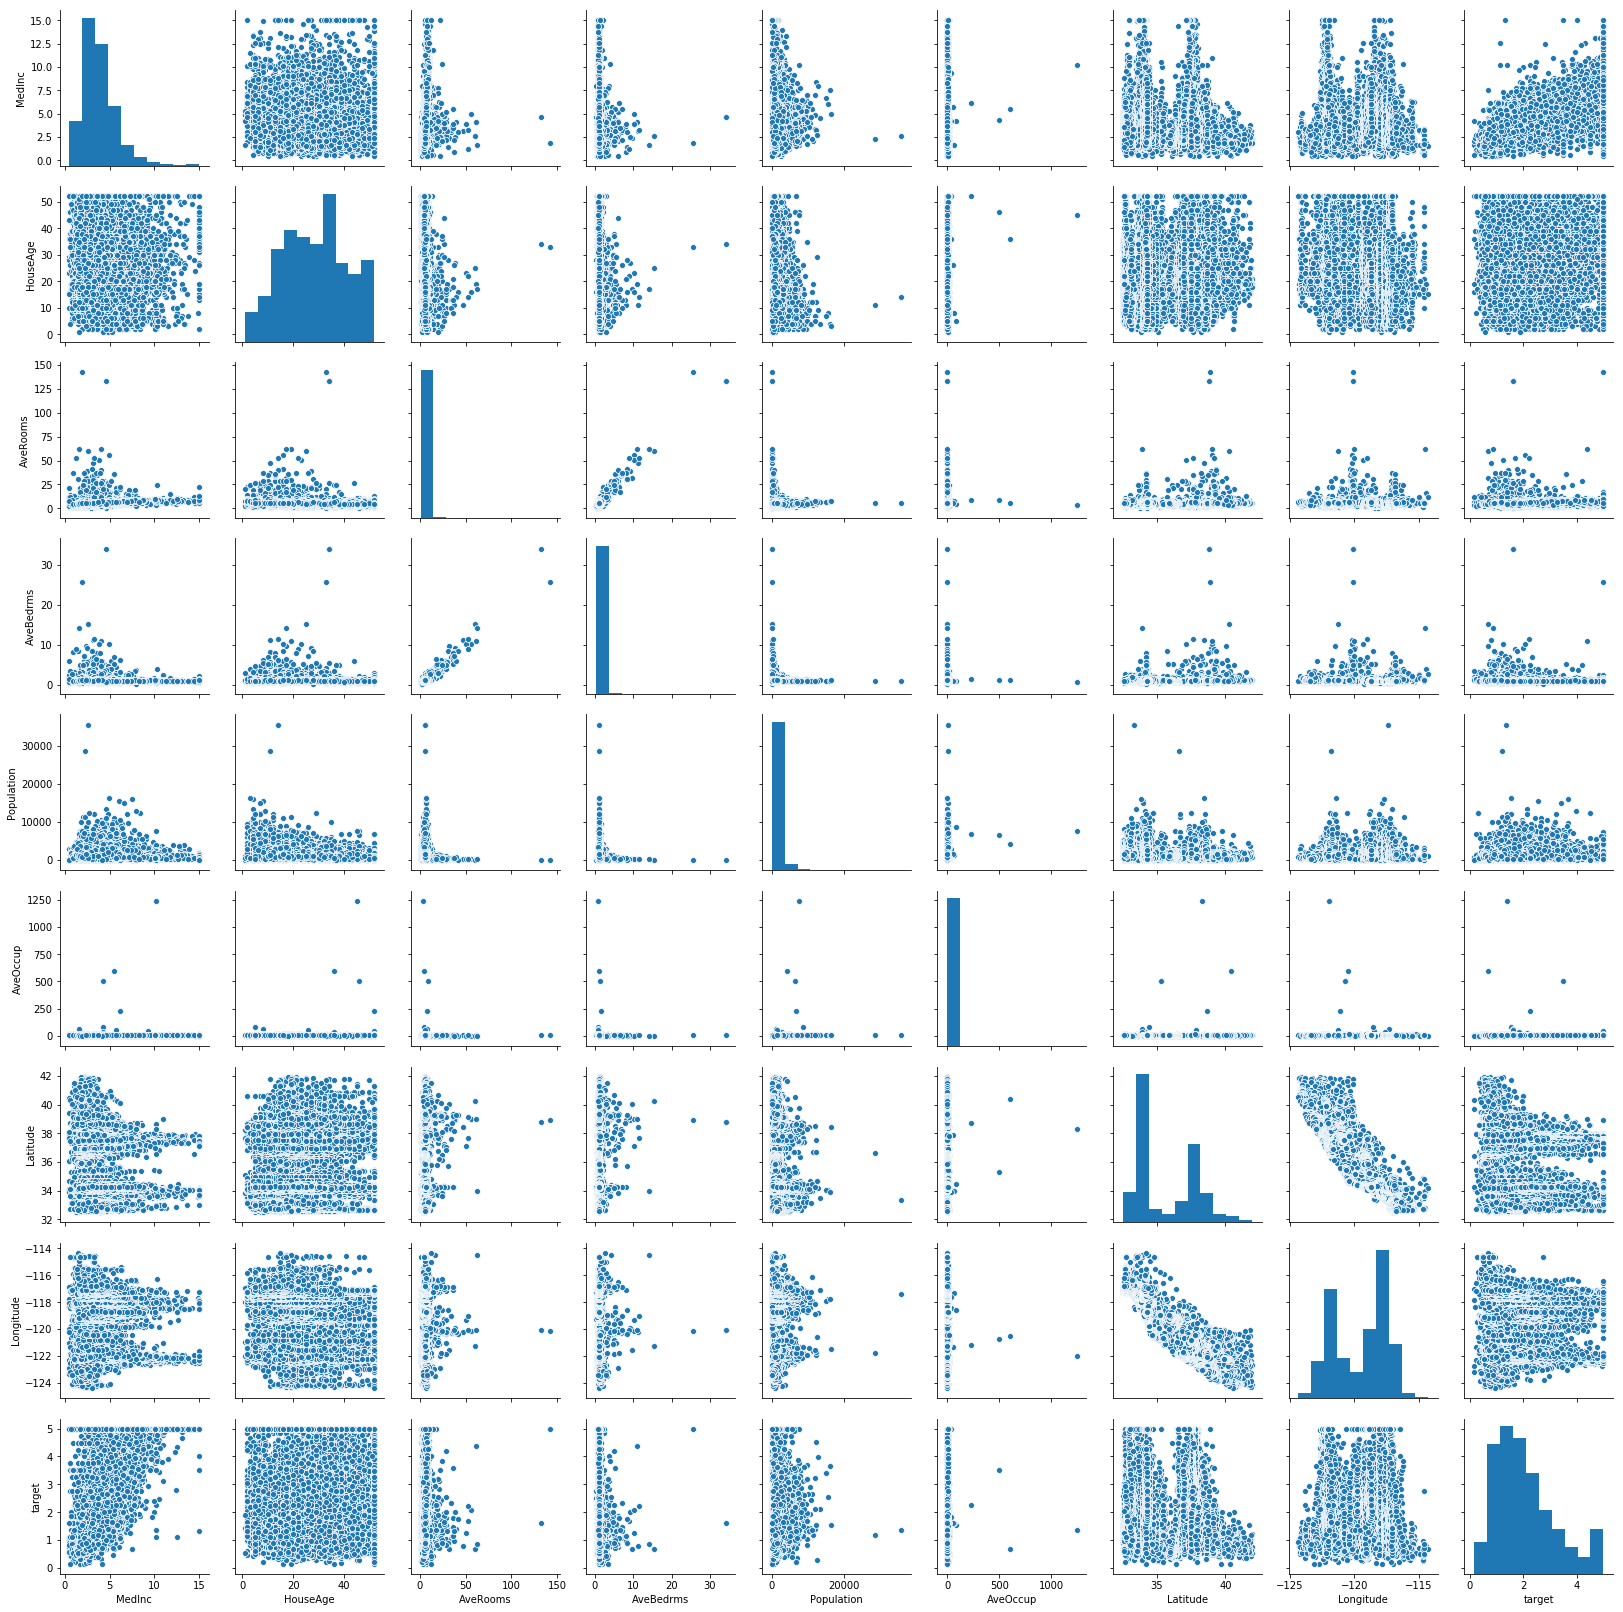

In [ ]:
sns.pairplot(train_df);

# 4) Categorical Plots:

Let's first make some categorical variables:

In [12]:
train_df['target_int'] = train_df['target']
train_df.loc[(train_df['target'] < 1), 'target_int'] = 0
train_df.loc[(train_df['target'] >= 1) & (train_df['target'] < 2), 'target_int'] = 1
train_df.loc[(train_df['target'] >= 2) & (train_df['target'] < 3), 'target_int'] = 2
train_df.loc[(train_df['target'] >=3) & (train_df['target'] < 4), 'target_int'] = 3
train_df.loc[(train_df['target'] >= 4), 'target_int'] = 4

In [13]:
train_df['medInc_int'] = train_df['MedInc']
# From 0th percentile to 25th percentile of Median Income's Distribution
train_df.loc[(train_df['MedInc'] < 2.56), 'medInc_int'] = train_df.loc[(train_df['MedInc'] < 2.56), 'MedInc'].mean()
# From 25th percentile to 50th percentile of Median Income's Distribution
train_df.loc[(train_df['MedInc'] >= 2.56) & (train_df['MedInc'] < 3.53), 'medInc_int'] = train_df.loc[(train_df['MedInc'] >= 2.56) & (train_df['MedInc'] < 3.53), 'MedInc'].mean()
# From 50th percentile to 75th percentile of Median Income's Distribution
train_df.loc[(train_df['MedInc'] >= 3.53) & (train_df['MedInc'] < 4.74), 'medInc_int'] = train_df.loc[(train_df['MedInc'] >= 3.53) & (train_df['MedInc'] < 4.74), 'MedInc'].mean()
# From 75th percentile to 80th percentile of Median Income's Distribution
train_df.loc[(train_df['MedInc'] >= 4.74) & (train_df['MedInc'] < 7), 'medInc_int'] = train_df.loc[(train_df['MedInc'] >= 4.74) & (train_df['MedInc'] < 7), 'MedInc'].mean()
# From 80th percentile to 100th percentile of Median Income's Distribution
train_df.loc[(train_df['MedInc'] >= 7), 'medInc_int'] = train_df.loc[(train_df['MedInc'] >= 7), 'MedInc'].mean()

### a) Bar plot:

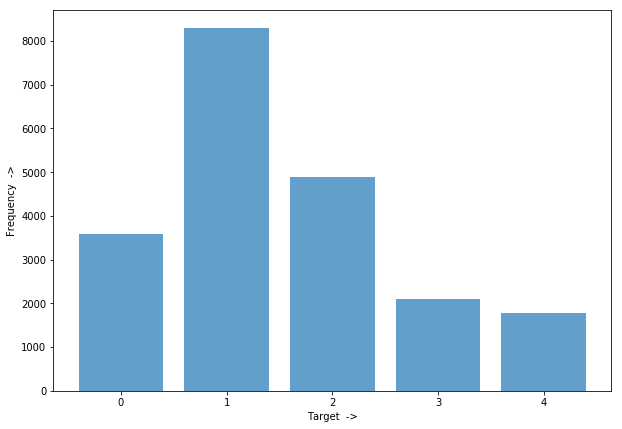

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.bar(np.sort(train_df['target_int'].unique()), train_df['target_int'].value_counts().sort_index(), alpha=0.7)

plt.xlabel("Target  ->")
plt.ylabel("Frequency  ->");

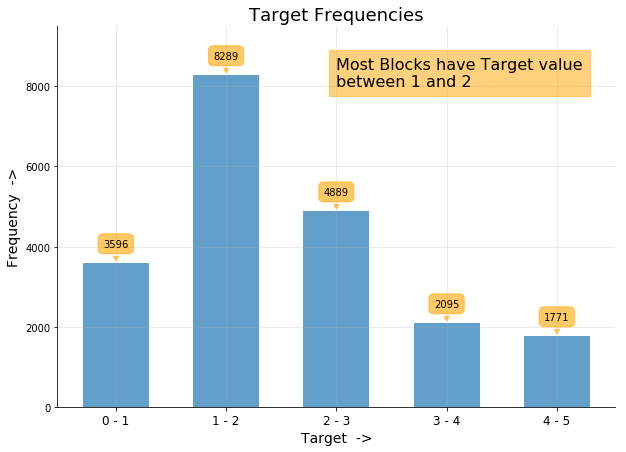

In [22]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.bar(np.sort(train_df['target_int'].unique()), train_df['target_int'].value_counts().sort_index(), alpha=0.7, width=0.6)

plt.grid(True, alpha=0.3)
plt.xlabel("Target  ->", fontsize=14)
plt.ylabel("Frequency  ->", fontsize=14)
plt.title("Target Frequencies", fontsize=18)

# Remove top and left spines:
ax = plt.gca() # Get current axis (gca)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adding annotations:
counts = train_df['target_int'].value_counts().sort_index()
plt.annotate(str(counts[0]), xy=(0, counts[0]), xytext=(0, counts[0]+400), ha = 'center', # horizontalalignment = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
plt.annotate(str(counts[1]), xy=(1, counts[1]), xytext=(1, counts[1]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
plt.annotate(str(counts[2]), xy=(2, counts[2]), xytext=(2, counts[2]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
plt.annotate(str(counts[3]), xy=(3, counts[3]), xytext=(3, counts[3]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
plt.annotate(str(counts[4]), xy=(4, counts[4]), xytext=(4, counts[4]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["0 - 1", "1 - 2", "2 - 3", "3 - 4", "4 - 5"], fontsize=12)
plt.ylim([0, 9500])
plt.text(2, 8000, "Most Blocks have Target value\nbetween 1 and 2", fontsize=16,
           bbox={'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.5, 'pad': 7});

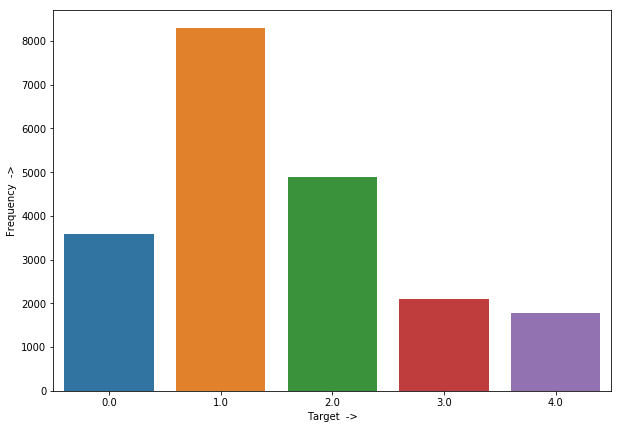

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

sns.barplot(np.sort(train_df['target_int'].unique()), train_df['target_int'].value_counts().sort_index())

plt.xlabel("Target  ->")
plt.ylabel("Frequency  ->");

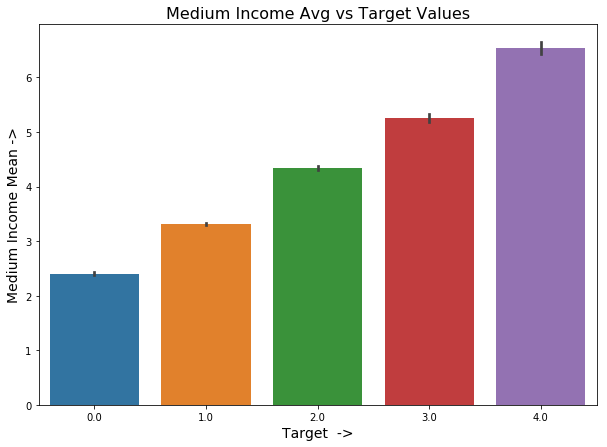

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

sns.barplot("target_int", "medInc_int", data=train_df)

plt.title("Medium Income Avg vs Target Values", fontsize=16)
plt.xlabel("Target  ->", fontsize=14)
plt.ylabel("Medium Income Mean ->", fontsize=14);

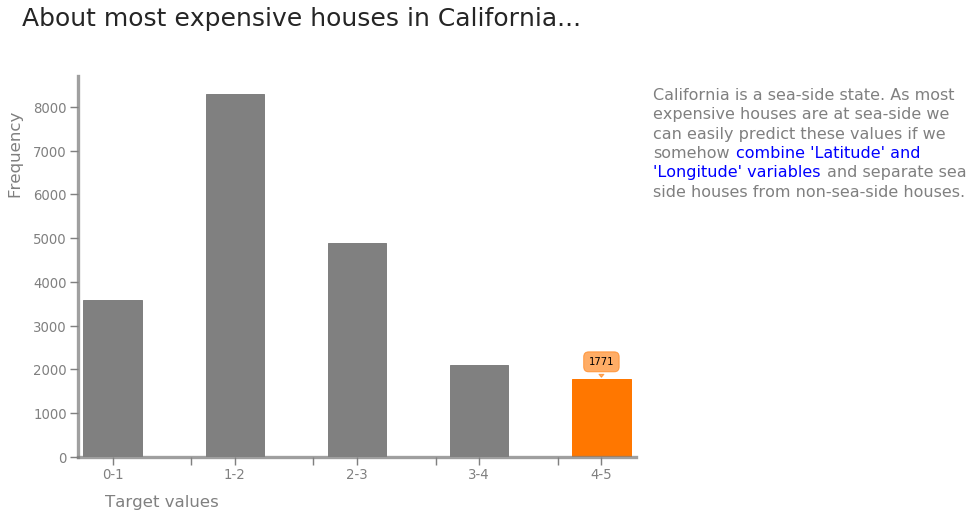

In [16]:
x, y = np.sort(train_df['target_int'].unique()), train_df['target_int'].value_counts().sort_index()
swm = SWMat(plt)
swm.bar(x, y, highlight={"cat": [-1]}, highlight_type={"data_type": "incrementalDown"},
        cat_labels=["0-1", "1-2", "2-3", "3-4", "4-5"], highlight_color={"cat_color": "#FF7700"}, annotate=True)
swm.axis(labels=["Target values", "Frequency"])
swm.title("About most expensive houses in California...")
swm.text("California is a sea-side state. As most\nexpensive houses are at sea-side we\ncan easily predict these values if we\nsomehow <prop color='blue'>combine 'Latitude' and\n'Longitude' variables </prop>and separate sea\nside houses from non-sea-side houses.",
        btw_text_dist=.1);

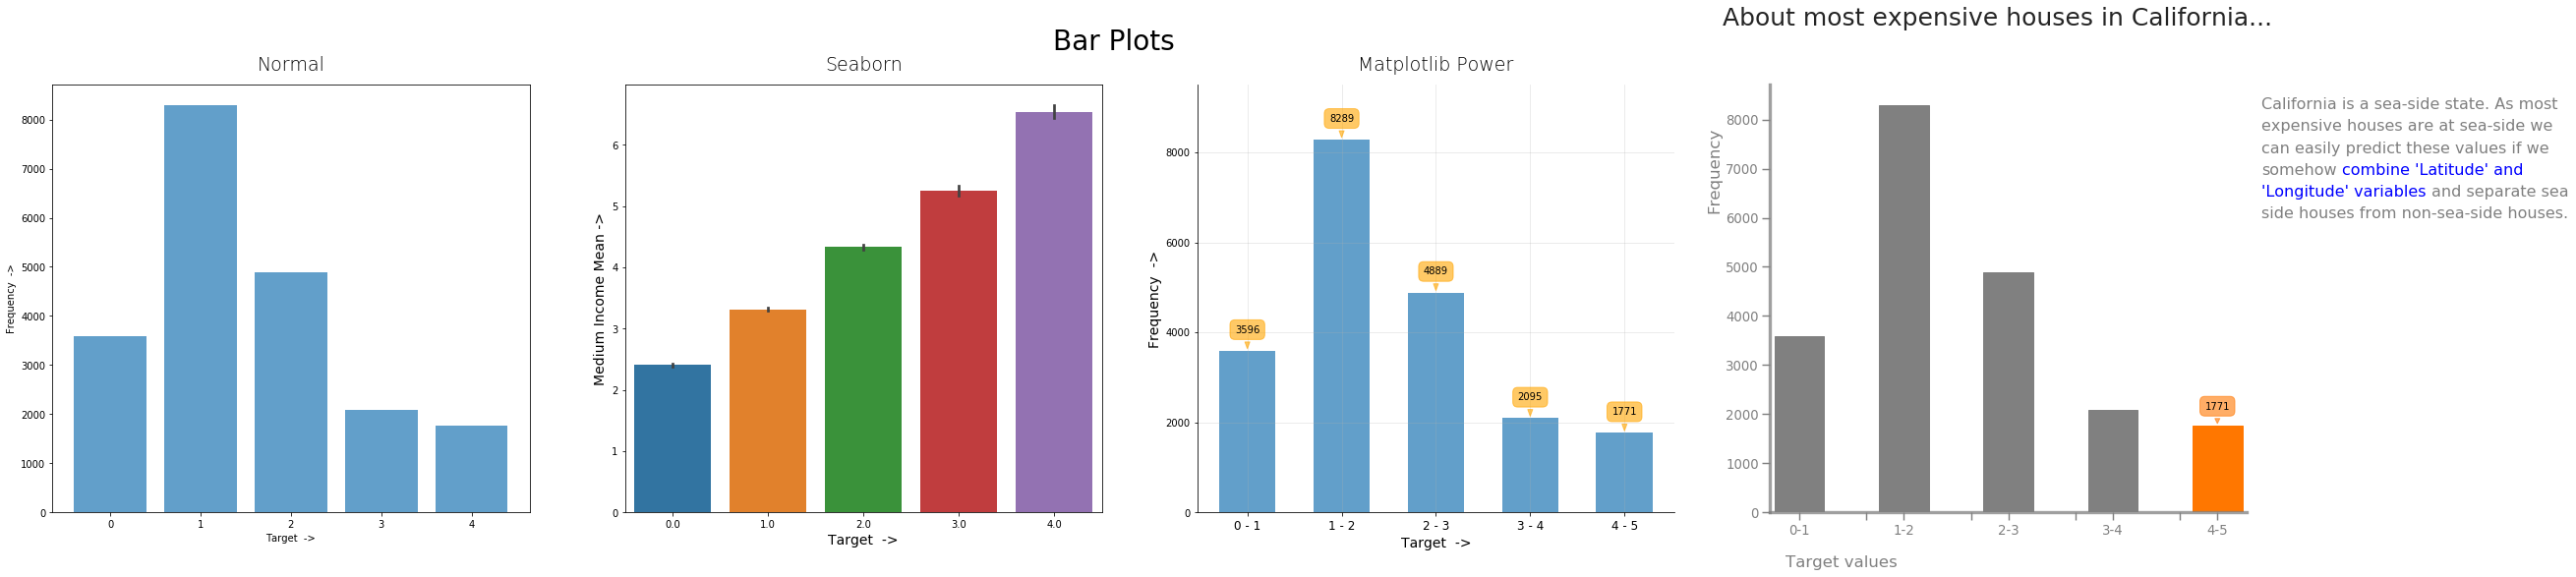

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(40, 8))
fig.suptitle("Bar Plots", fontsize=28)

axs[0].bar(np.sort(train_df['target_int'].unique()), train_df['target_int'].value_counts().sort_index(), alpha=0.7)
axs[0].set_title("Normal", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
axs[0].set_xlabel("Target  ->")
axs[0].set_ylabel("Frequency  ->")

sns.barplot("target_int", "medInc_int", data=train_df, ax=axs[1])
axs[1].set_title("Seaborn", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
axs[1].set_xlabel("Target  ->", fontsize=14)
axs[1].set_ylabel("Medium Income Mean ->", fontsize=14)

axs[2].bar(np.sort(train_df['target_int'].unique()), train_df['target_int'].value_counts().sort_index(), alpha=0.7, width=0.6)
axs[2].grid(True, alpha=0.3)
axs[2].set_xlabel("Target  ->", fontsize=14)
axs[2].set_ylabel("Frequency  ->", fontsize=14)
axs[2].set_title("Matplotlib Power", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
# Remove top and left spines:
axs[2].spines['right'].set_visible(False)
axs[2].spines['top'].set_visible(False)
# Adding annotations:
counts = train_df['target_int'].value_counts().sort_index()
axs[2].annotate(str(counts[0]), xy=(0, counts[0]), xytext=(0, counts[0]+400), ha = 'center', # horizontalalignment = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
axs[2].annotate(str(counts[1]), xy=(1, counts[1]), xytext=(1, counts[1]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
axs[2].annotate(str(counts[2]), xy=(2, counts[2]), xytext=(2, counts[2]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
axs[2].annotate(str(counts[3]), xy=(3, counts[3]), xytext=(3, counts[3]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
axs[2].annotate(str(counts[4]), xy=(4, counts[4]), xytext=(4, counts[4]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
axs[2].set_xticks([0, 1, 2, 3, 4])
axs[2].set_xticklabels(["0 - 1", "1 - 2", "2 - 3", "3 - 4", "4 - 5"], fontsize=12)
axs[2].set_ylim([0, 9500])

x, y = np.sort(train_df['target_int'].unique()), train_df['target_int'].value_counts().sort_index()
swm = SWMat(plt, ax=axs[3])
swm.bar(x, y, highlight={"cat": [-1]}, highlight_type={"data_type": "incrementalDown"},
        cat_labels=["0-1", "1-2", "2-3", "3-4", "4-5"], highlight_color={"cat_color": "#FF7700"}, annotate=True)
swm.axis(labels=["Target values", "Frequency"])
swm.title("About most expensive houses in California...")
swm.text("California is a sea-side state. As most\nexpensive houses are at sea-side we\ncan easily predict these values if we\nsomehow <prop color='blue'>combine 'Latitude' and\n'Longitude' variables </prop>and separate sea\nside houses from non-sea-side houses.",
        btw_text_dist=.1);

### b) Box Plot:

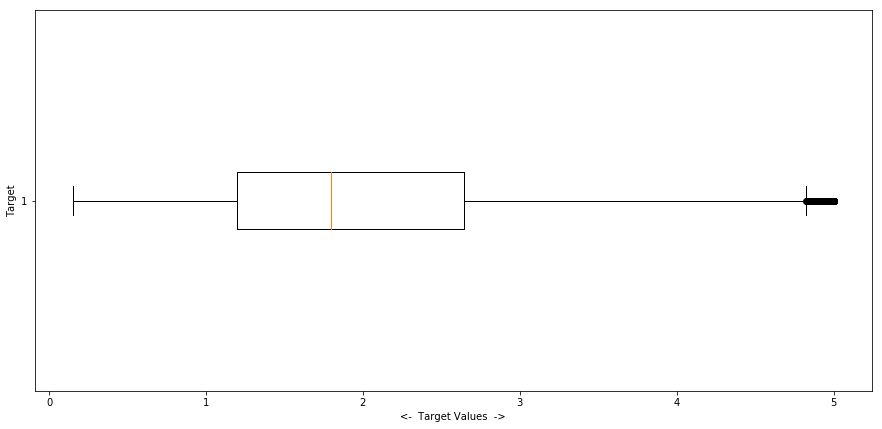

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(15, 7))

plt.boxplot(train_df['target'], vert=False)

plt.xlabel("<-  Target Values  ->")
plt.ylabel("Target");

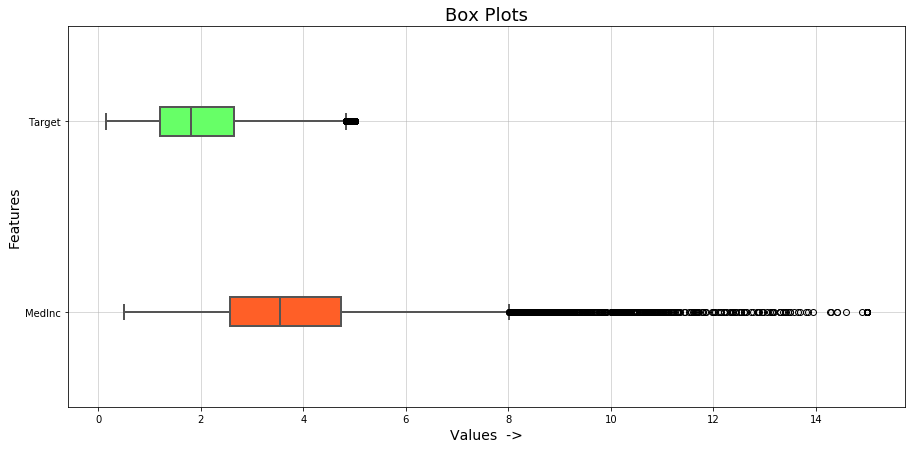

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(15, 7))

bp = plt.boxplot([train_df['MedInc'], train_df['target']], vert=False, patch_artist=True) # patch_artist for coloring box plot

plt.grid(True, alpha=0.6)
plt.title("Box Plots", fontsize=18)
plt.xlabel("Values  ->", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.yticks(ticks=[1, 2], labels=['MedInc', 'Target'])

# Coloring Box Plots and ...  (https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color)
for el in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    for i in range(len(bp[el])):
        plt.setp(bp[el][i], color='#555555')
        plt.setp(bp[el][i], linewidth=2)

bp['boxes'][0].set(facecolor='#FF5F27')
bp['boxes'][1].set(facecolor="#67FF67");

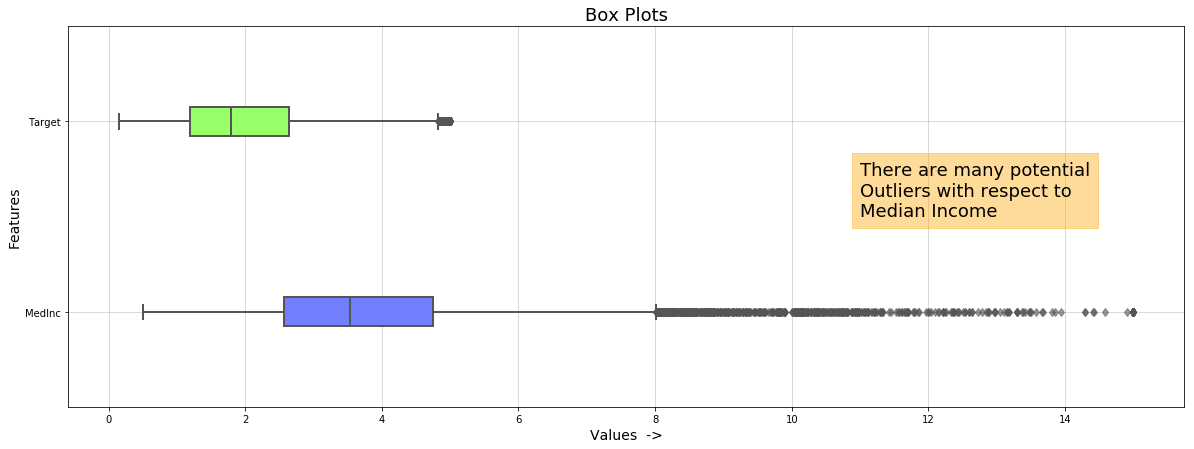

In [65]:
from matplotlib.pyplot import figure
figure(figsize=(20, 7))

bp = plt.boxplot([train_df['MedInc'], train_df['target']], vert=False, patch_artist=True,
                flierprops={'alpha':0.6, 'markersize': 6, 'markeredgecolor': '#555555','marker': 'd',
                           'markerfacecolor': "#555555"}, # (https://stackoverflow.com/questions/32480988/matplotlib-fliers-in-boxplot-object-not-setting-correctly)
                capprops={'color': '#555555', 'linewidth': 2},
                boxprops={'color': '#555555', 'linewidth': 2},
                whiskerprops={'color': '#555555', 'linewidth': 2},
                medianprops={'color': '#555555', 'linewidth': 2},
                meanprops={'color': '#555555', 'linewidth': 2}) # outlier are computed but not drawn

plt.grid(True, alpha=0.6)
plt.title("Box Plots", fontsize=18)
plt.xlabel("Values  ->", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.yticks(ticks=[1, 2], labels=['MedInc', 'Target'])

bp['boxes'][0].set(facecolor='#727FFF')
bp['boxes'][1].set(facecolor="#97FF67")

# Adding Text:
plt.text(11, 1.5, "There are many potential\nOutliers with respect to\nMedian Income", fontsize=18,
        bbox={'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.4, 'pad': 8});

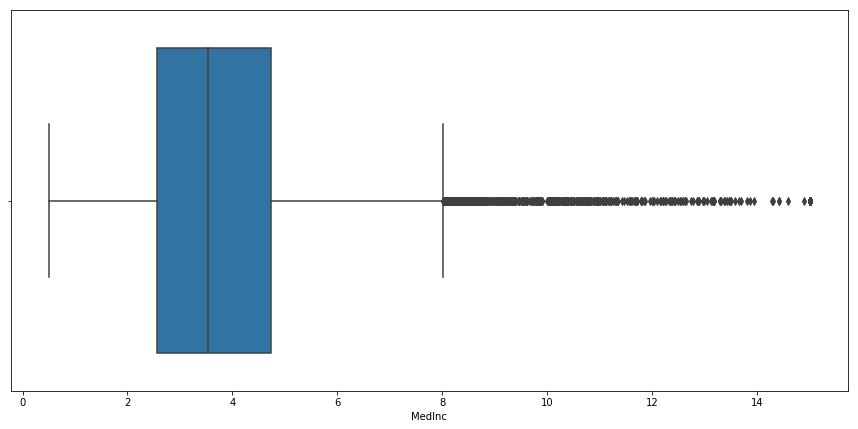

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(15, 7))

sns.boxplot(train_df['MedInc']); # We can only plot one box like this...

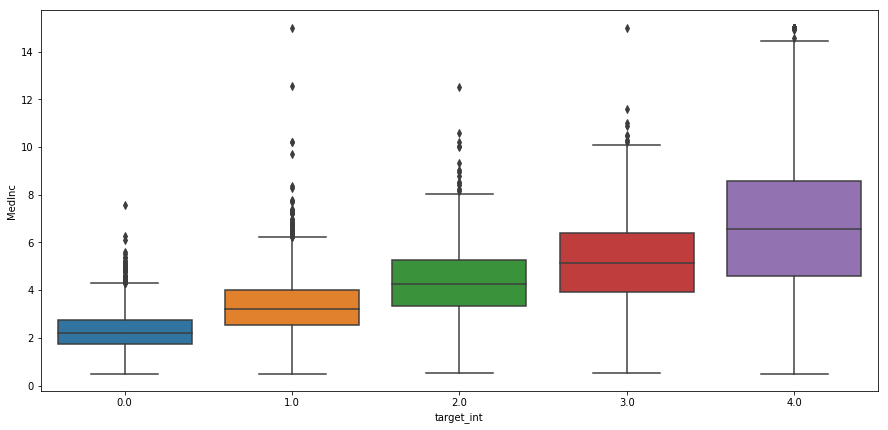

In [ ]:
# But we can do something like this with seaborn:
from matplotlib.pyplot import figure
figure(figsize=(15, 7))

sns.boxplot(train_df['target_int'], train_df['MedInc']);

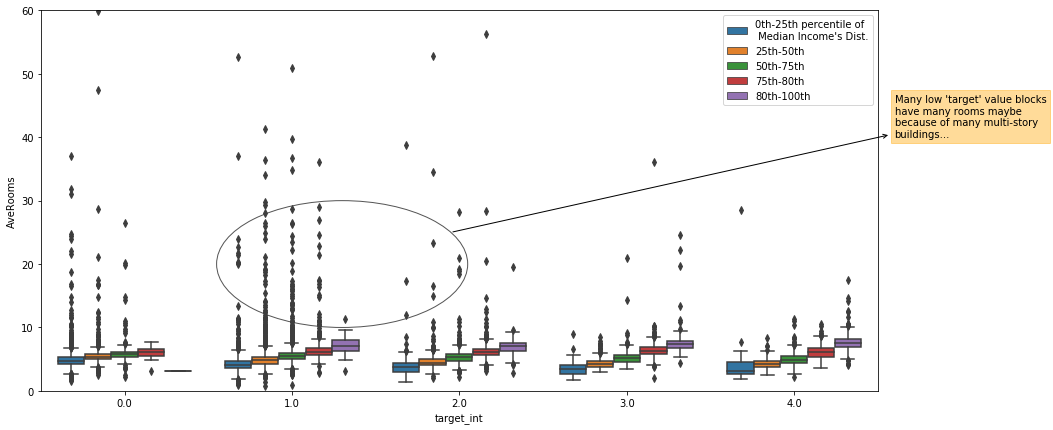

In [ ]:
# Or ...
from matplotlib.pyplot import figure
figure(figsize=(15, 7))

bp = sns.boxplot(train_df['target_int'], train_df['AveRooms'], hue = train_df['medInc_int'])
plt.ylim([0, 60])

# Changing Legend (with patches):
ps = bp.get_legend_handles_labels()[0] # Patches
plt.legend(ps, ["0th-25th percentile of\n Median Income's Dist.", 
          "25th-50th",
          "50th-75th", 
          "75th-80th",
          "80th-100th"])

### Adding Info: (https://matplotlib.org/examples/shapes_and_collections/artist_reference.html)
## Adding Circle:
import matplotlib.patches as mpatches

eps = mpatches.Ellipse(xy=(1.3, 20), width=1.5, height=20, edgecolor="#555555", fill=False)
ax = plt.gca() # get current axes (gca)
ax.add_patch(eps)
## Adding annotations:
plt.annotate("Many low 'target' value blocks\nhave many rooms maybe\nbecause of many multi-story\nbuildings...",
            xy=(1.95, 25), xytext=(4.6, 40),
            arrowprops={'arrowstyle':'<-', 'color':'k'},
            bbox={'facecolor': 'orange', 'edgecolor':'orange', 'alpha':0.4, 'pad': 4});

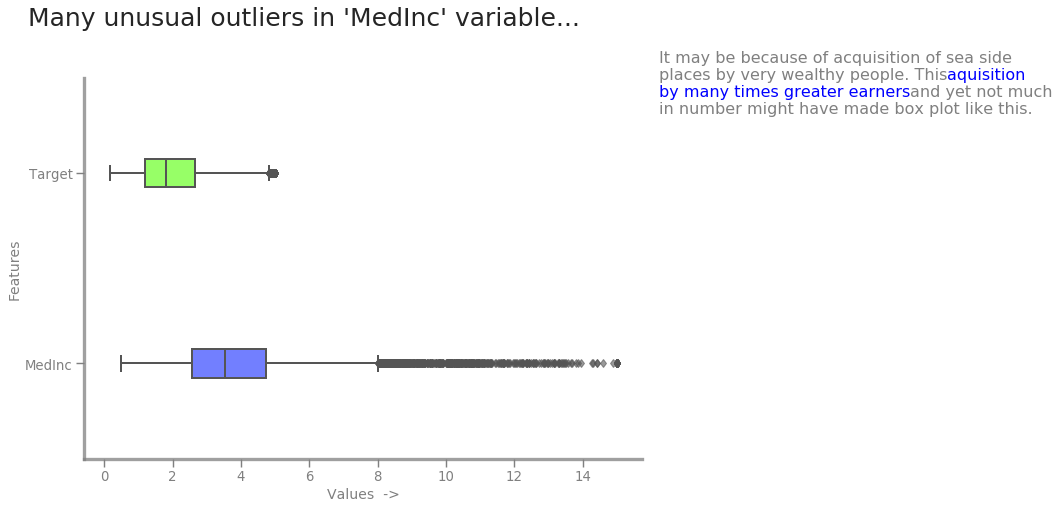

In [55]:
swm = SWMat(plt)
bp = plt.boxplot([train_df['MedInc'], train_df['target']], vert=False, patch_artist=True,
                 # (https://stackoverflow.com/questions/32480988/matplotlib-fliers-in-boxplot-object-not-setting-correctly)
                flierprops={'alpha':0.6, 'markersize': 6, 'markeredgecolor': '#555555','marker': 'd',
                           'markerfacecolor': "#555555"}, 
                capprops={'color': '#555555', 'linewidth': 2},
                boxprops={'color': '#555555', 'linewidth': 2},
                whiskerprops={'color': '#555555', 'linewidth': 2},
                medianprops={'color': '#555555', 'linewidth': 2},
                meanprops={'color': '#555555', 'linewidth': 2}) # outlier are computed but not drawn
plt.xlabel("Values  ->", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.yticks(ticks=[1, 2], labels=['MedInc', 'Target'])
bp['boxes'][0].set(facecolor='#727FFF')
bp['boxes'][1].set(facecolor="#97FF67");

swm.title("Many unusual outliers in 'MedInc' variable...")
swm.text(("It may be because of acquisition of sea side\n"
          "places by very wealthy people. This <prop color='blue'>aquisition\n"
          "by many times greater earners</prop> and yet not much\n"
          "in number might have made box plot like this."), btw_line_dist=.15, btw_text_dist=.01);

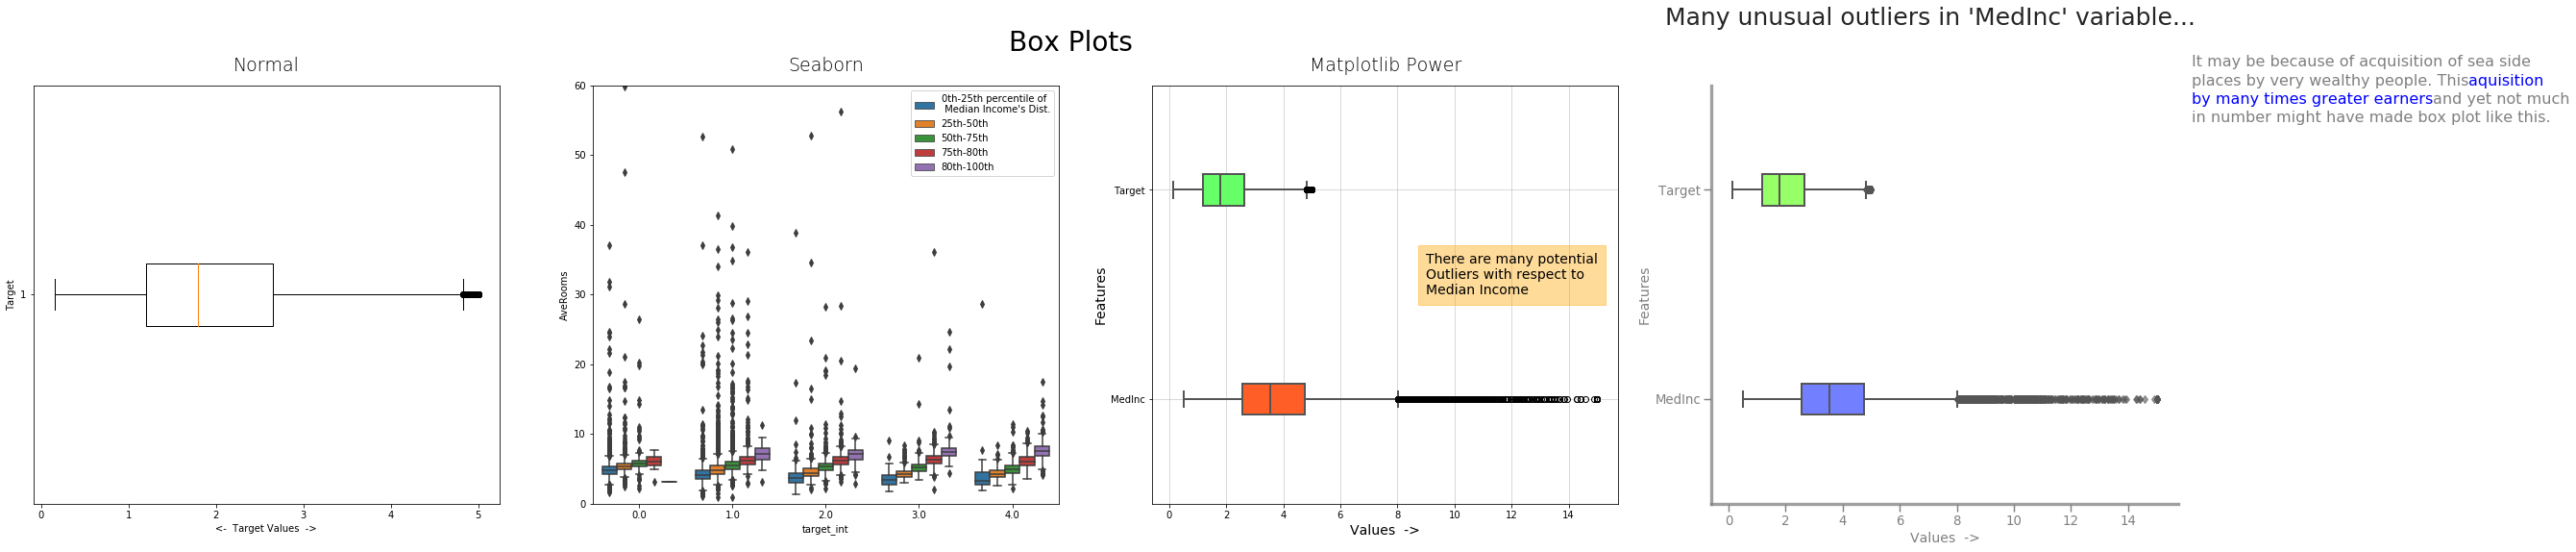

In [56]:
fig, axs = plt.subplots(1, 4, figsize=(40, 8))
fig.suptitle("Box Plots", fontsize=28)

axs[0].boxplot(train_df['target'], vert=False)
axs[0].set_title("Normal", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
axs[0].set_xlabel("<-  Target Values  ->")
axs[0].set_ylabel("Target")

bp = sns.boxplot(train_df['target_int'], train_df['AveRooms'], hue = train_df['medInc_int'], ax=axs[1])
axs[1].set_title("Seaborn", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
axs[1].set_ylim([0, 60])
# Changing Legend (with patches):
ps = bp.get_legend_handles_labels()[0] # Patches
axs[1].legend(ps, ["0th-25th percentile of\n Median Income's Dist.", 
          "25th-50th",
          "50th-75th", 
          "75th-80th",
          "80th-100th"])

bp = axs[2].boxplot([train_df['MedInc'], train_df['target']], vert=False, patch_artist=True) # patch_artist for coloring box plot
axs[2].grid(True, alpha=0.6)
axs[2].set_title("Matplotlib Power", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
axs[2].set_xlabel("Values  ->", fontsize=14)
axs[2].set_ylabel("Features", fontsize=14)
axs[2].set_yticks([1, 2])
axs[2].set_yticklabels(['MedInc', 'Target'])
# Coloring Box Plots and ...  (https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color)
for el in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    for i in range(len(bp[el])):
        bp[el][i].set_color('#555555')
        bp[el][i].set_linewidth(2)
bp['boxes'][0].set(facecolor='#FF5F27')
bp['boxes'][1].set(facecolor="#67FF67")
# Adding Text:
axs[2].text(9, 1.5, "There are many potential\nOutliers with respect to\nMedian Income", fontsize=14,
        bbox={'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.4, 'pad': 8});

swm = SWMat(plt, ax=axs[3])
bp = axs[3].boxplot([train_df['MedInc'], train_df['target']], vert=False, patch_artist=True,
                 # (https://stackoverflow.com/questions/32480988/matplotlib-fliers-in-boxplot-object-not-setting-correctly)
                flierprops={'alpha':0.6, 'markersize': 6, 'markeredgecolor': '#555555','marker': 'd',
                           'markerfacecolor': "#555555"}, 
                capprops={'color': '#555555', 'linewidth': 2},
                boxprops={'color': '#555555', 'linewidth': 2},
                whiskerprops={'color': '#555555', 'linewidth': 2},
                medianprops={'color': '#555555', 'linewidth': 2},
                meanprops={'color': '#555555', 'linewidth': 2}) # outlier are computed but not drawn
axs[3].set_xlabel("Values  ->", fontsize=14)
axs[3].set_ylabel("Features", fontsize=14)
axs[3].set_yticks(ticks=[1, 2])
axs[3].set_yticklabels(['MedInc', 'Target'])
bp['boxes'][0].set(facecolor='#727FFF')
bp['boxes'][1].set(facecolor="#97FF67");

swm.title("Many unusual outliers in 'MedInc' variable...")
swm.text(("It may be because of acquisition of sea side\n"
          "places by very wealthy people. This <prop color='blue'>aquisition\n"
          "by many times greater earners</prop> and yet not much\n"
          "in number might have made box plot like this."),btw_line_dist=.15,btw_text_dist=.01);

Here you can say **seaborn** has taken an edge because of simplisity of making multicategorical box plots.

### c) Violin Plot:

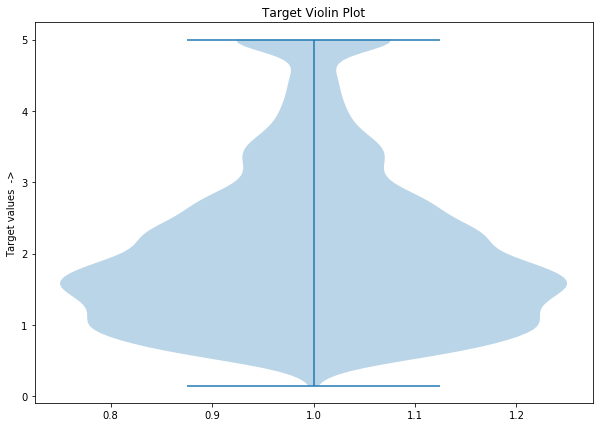

In [78]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.violinplot(train_df['target'])

plt.title("Target Violin Plot")
plt.ylabel("Target values  ->");

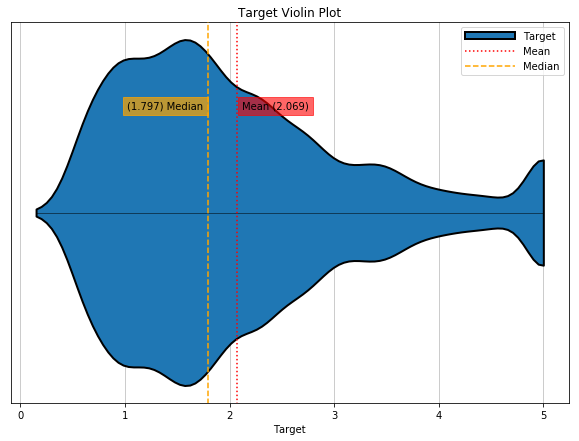

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

vp = plt.violinplot(train_df['target'], vert=False, showmeans=True, showmedians=True)

# Returns a dictionary with keys : ['bodies', 'cbars', 'cmaxes', 'cmeans', 'cmedians', 'cmins']
# Using these we can tinker with our plot:
vp['bodies'][0].set_edgecolor("k")
vp['bodies'][0].set_linewidth(2)
vp['bodies'][0].set_alpha(1.0)
vp['bodies'][0].set_zorder(10)

vp['cmeans'].set_linestyle(":")
vp['cmeans'].set_color("r")
vp['cmeans'].set_zorder(101)
vp['cmeans'].set_segments(np.array([[[2.06855817, 0.7], [2.06855817, 1.3]]]))

vp['cmedians'].set_linestyle("--")
vp['cmedians'].set_color("orange")
vp['cmedians'].set_zorder(100)
vp['cmedians'].set_segments(np.array([[[1.797, 0.7], [1.797, 1.3]]]))

vp['cbars'].set_zorder(99)
vp['cbars'].set_color("k")
vp['cbars'].set_linewidth(0.5)

vp['cmaxes'].set_visible(False)
vp['cmins'].set_visible(False)

# Legend:
plt.legend(handles=[vp['bodies'][0], vp['cmeans'], vp['cmedians']], labels=["Target", "Mean", "Median"], handlelength=5)

plt.title("Target Violin Plot")
plt.xlabel("Target")
plt.yticks([])
plt.grid(True, alpha=0.8)

# Adding Text
plt.text(1.797-0.773, 1.15, f"({train_df['target'].median()}) Median", fontdict=None,
         bbox={'facecolor':'orange', 'edgecolor': 'orange', 'pad':4, 'alpha': 0.7}, zorder=12)
plt.text(2.06855817+0.05, 1.15, f"Mean ({np.round(train_df['target'].mean(),3)})", fontdict=None,
         bbox={'facecolor':'red', 'edgecolor': 'red', 'pad':4, 'alpha': 0.6}, zorder=11);
#vp['cmeans'].get_segments()

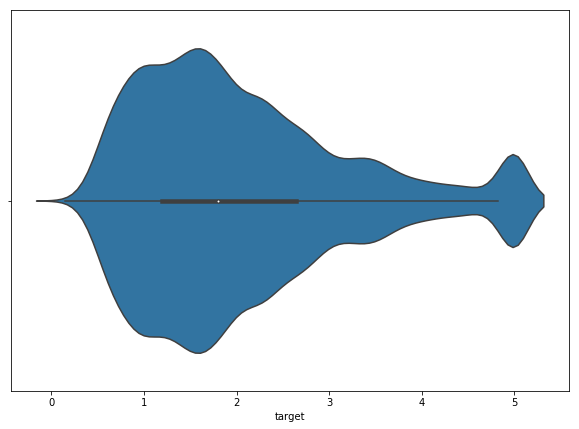

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

sns.violinplot(train_df['target']);

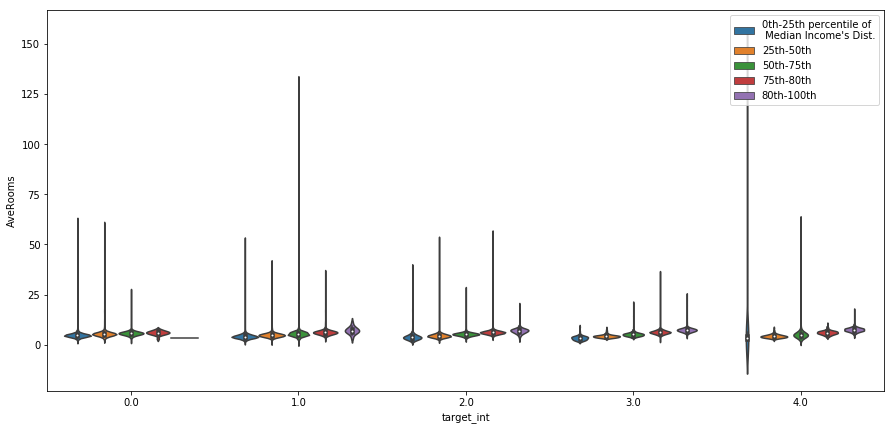

In [16]:
from matplotlib.pyplot import figure
figure(figsize=(15, 7))

vp = sns.violinplot(train_df['target_int'], train_df['AveRooms'], hue = train_df['medInc_int'])

# Changing Legend (with patches):
ps = vp.get_legend_handles_labels()[0] # Patches
plt.legend(ps, ["0th-25th percentile of\n Median Income's Dist.", 
          "25th-50th",
          "50th-75th", 
          "75th-80th",
          "80th-100th"]);

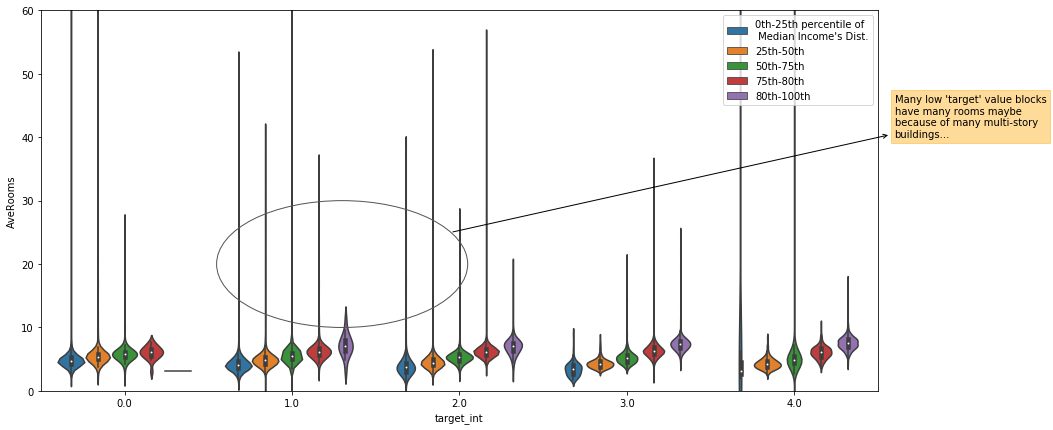

In [49]:
plt.figure(figsize=(15, 7))

vp = sns.violinplot(train_df['target_int'], train_df['AveRooms'], hue = train_df['medInc_int'])
# Changing Legend (with patches):
ps = vp.get_legend_handles_labels()[0] # Patches
plt.legend(ps, ["0th-25th percentile of\n Median Income's Dist.", 
          "25th-50th",
          "50th-75th", 
          "75th-80th",
          "80th-100th"])
plt.ylim([0, 60])
### Adding Info: (https://matplotlib.org/examples/shapes_and_collections/artist_reference.html)
## Adding Circle:
import matplotlib.patches as mpatches
eps = mpatches.Ellipse(xy=(1.3, 20), width=1.5, height=20, edgecolor="#555555", fill=False)
plt.gca().add_patch(eps)
## Adding annotations:
plt.annotate("Many low 'target' value blocks\nhave many rooms maybe\nbecause of many multi-story\nbuildings...",
            xy=(1.95, 25), xytext=(4.6, 40),
            arrowprops={'arrowstyle':'<-', 'color':'k'},
            bbox={'facecolor': 'orange', 'edgecolor':'orange', 'alpha':0.4, 'pad': 4});

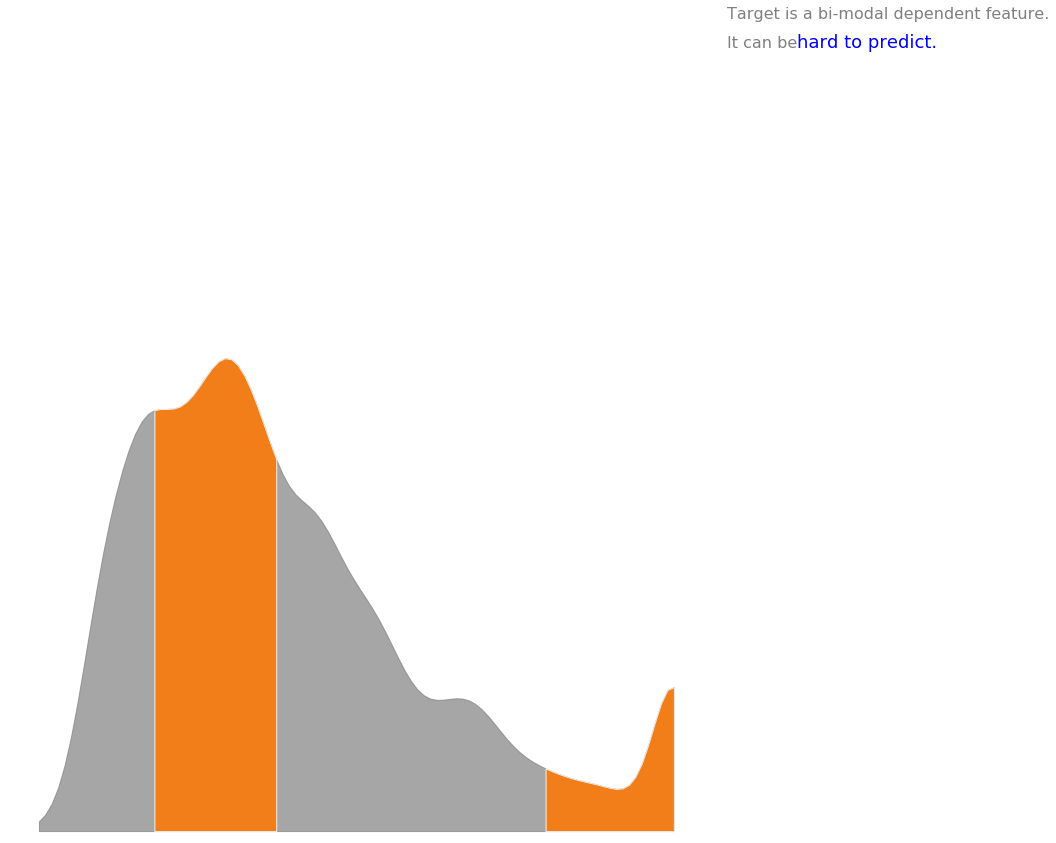

In [25]:
swm = SWMat(plt)
swm.violinplot(train_df['target'], highlight={"0":[(1, 2), (4, 6)]})
#swm.text("Carefully looking at the dependent variable revealed some problems that might occur!", position=[-.05, 1.0]);
swm.text("Target is a bi-modal dependent feature.\nIt can be <prop fontsize='18' color='blue'> hard to predict.<\prop>", btw_line_dist=1e-3, btw_text_dist=.01, position=[1.03, 0]);

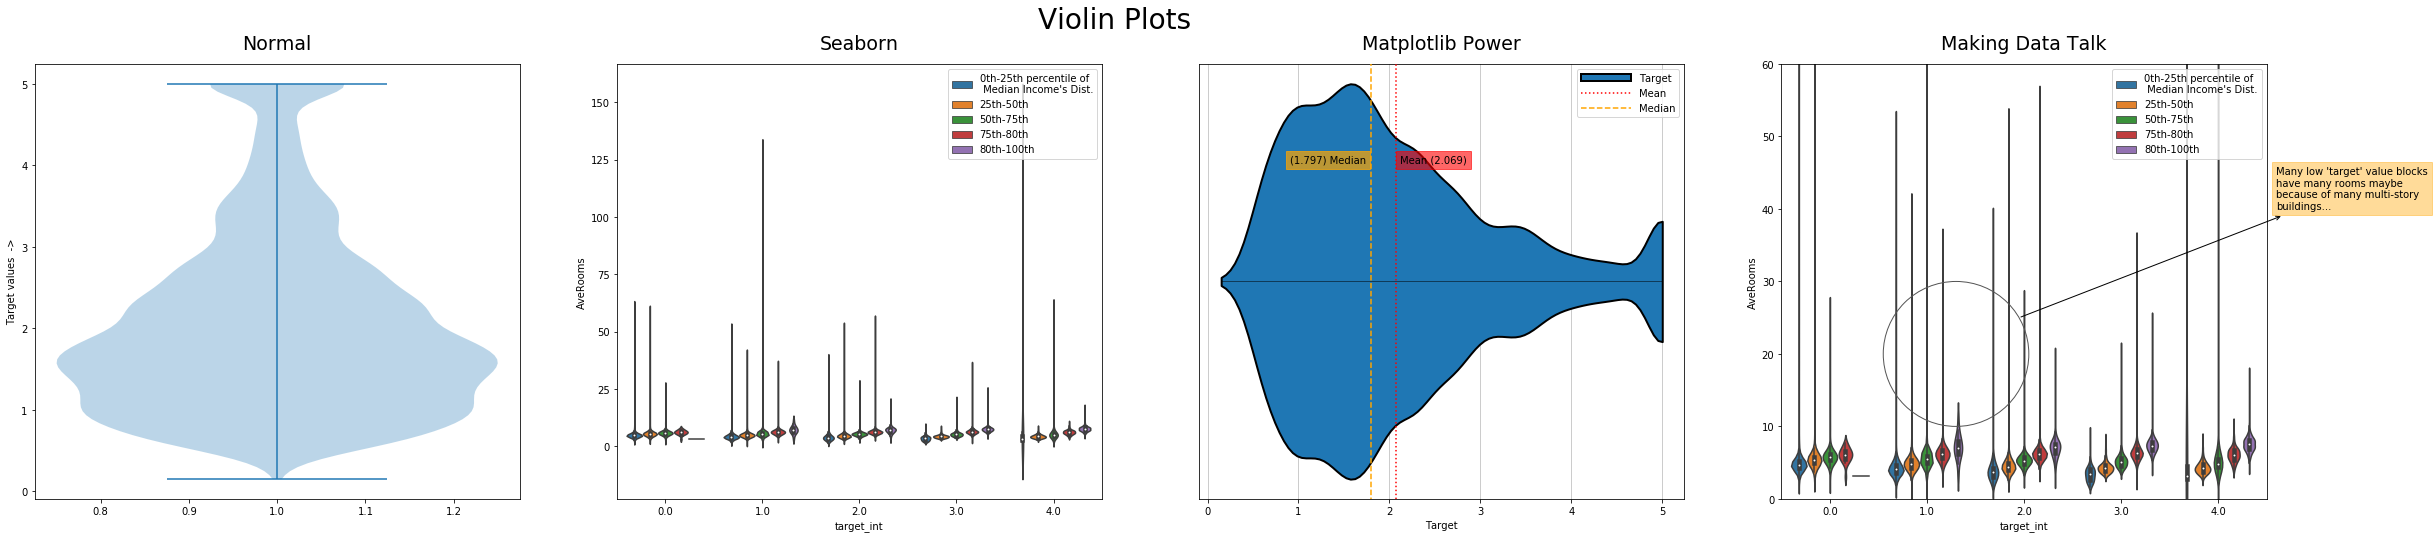

In [83]:
fig, axs = plt.subplots(1, 4, figsize=(40, 8))
fig.suptitle("Violin Plots", fontsize=28)

axs[0].set_title("Normal", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
axs[0].violinplot(train_df['target'])
axs[0].set_ylabel("Target values  ->")

vp = sns.violinplot(train_df['target_int'], train_df['AveRooms'], hue = train_df['medInc_int'], ax=axs[1])
# Changing Legend (with patches):
ps = vp.get_legend_handles_labels()[0] # Patches
axs[1].legend(ps, ["0th-25th percentile of\n Median Income's Dist.", 
          "25th-50th",
          "50th-75th", 
          "75th-80th",
          "80th-100th"])

axs[1].set_title("Seaborn", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
vp = axs[2].violinplot(train_df['target'], vert=False, showmeans=True, showmedians=True)
# Returns a dictionary with keys : ['bodies', 'cbars', 'cmaxes', 'cmeans', 'cmedians', 'cmins']
# Using these we can tinker with our plot:
vp['bodies'][0].set_edgecolor("k")
vp['bodies'][0].set_linewidth(2)
vp['bodies'][0].set_alpha(1.0)
vp['bodies'][0].set_zorder(10)
vp['cmeans'].set_linestyle(":")
vp['cmeans'].set_color("r")
vp['cmeans'].set_zorder(101)
vp['cmeans'].set_segments(np.array([[[2.06855817, 0.7], [2.06855817, 1.3]]]))
vp['cmedians'].set_linestyle("--")
vp['cmedians'].set_color("orange")
vp['cmedians'].set_zorder(100)
vp['cmedians'].set_segments(np.array([[[1.797, 0.7], [1.797, 1.3]]]))
vp['cbars'].set_zorder(99)
vp['cbars'].set_color("k")
vp['cbars'].set_linewidth(0.5)
vp['cmaxes'].set_visible(False)
vp['cmins'].set_visible(False)
# Legend:
axs[2].legend(handles=[vp['bodies'][0], vp['cmeans'], vp['cmedians']], labels=["Target", "Mean", "Median"], handlelength=5)
axs[2].set_title("Matplotlib Power", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
axs[2].set_xlabel("Target")
axs[2].set_yticks([])
axs[2].grid(True, alpha=0.8)
# Adding Text
axs[2].text(1.797-0.893, 1.15, f"({train_df['target'].median()}) Median", fontdict=None,
         bbox={'facecolor':'orange', 'edgecolor': 'orange', 'pad':4, 'alpha': 0.7}, zorder=12)
axs[2].text(2.06855817+0.05, 1.15, f"Mean ({np.round(train_df['target'].mean(),3)})", fontdict=None,
         bbox={'facecolor':'red', 'edgecolor': 'red', 'pad':4, 'alpha': 0.6}, zorder=11)



# 5) Multiple Plots:

### a) Joint Distribution:

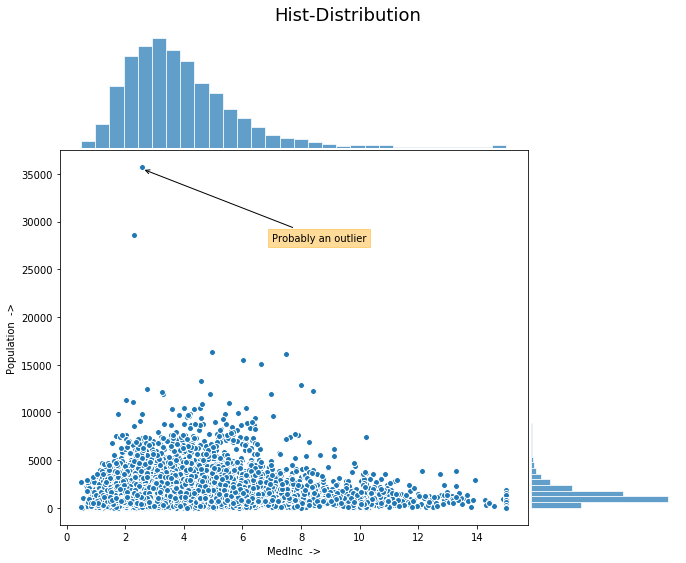

In [ ]:
plt.figure(1, figsize=(10, 8))
plt.suptitle("Hist-Distribution", fontsize=18, y=1)

# Now lets make some axes (diff graphs) in this figure
axScatter = plt.axes([0.1, 0.1, 0.65, 0.65]) # [left, bottom, width, height] in percent values
axHistx = plt.axes([0.1, 0.755, 0.65, 0.2])
axHisty = plt.axes([0.755, 0.1, 0.2, 0.65])

axHistx.set_xticks([])
axHistx.set_yticks([])
axHisty.set_xticks([])
axHisty.set_yticks([])
axHistx.set_frame_on(False)
axHisty.set_frame_on(False)
axScatter.set_xlabel("MedInc  ->")
axScatter.set_ylabel("Population  ->")

# Lets plot in these axes:
axScatter.scatter('MedInc', 'Population', data=train_df, edgecolors='w')
axHistx.hist('MedInc', bins=30, data=train_df, ec='w', density=True, alpha=0.7)
axHisty.hist('Population', bins=60, data=train_df, ec='w', density=True, alpha=0.7, orientation='horizontal')
#train_df['MedInc'].plot.kde(ax=axHistx, color='b')
axHistx.set_ylabel("")

# Adding annotations:
axScatter.annotate("Probably an outlier", xy=(2.6, 35500), xytext=(7, 28000),
                   arrowprops={'arrowstyle':'->'}, 
                   bbox={'pad':4, 'facecolor':'orange', 'alpha': 0.4, 'edgecolor':'orange'});

<Figure size 720x576 with 0 Axes>

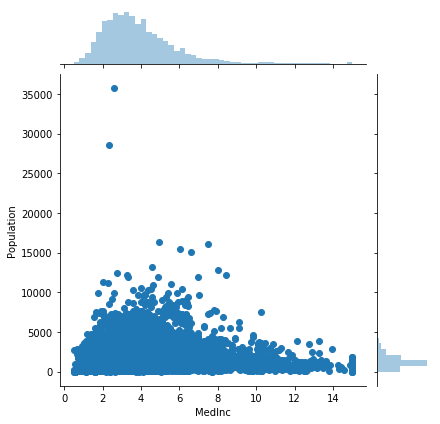

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))

sns.jointplot('MedInc', 'Population', data=train_df);

# 6) Interactive Plots:

<IPython.core.display.Javascript object>


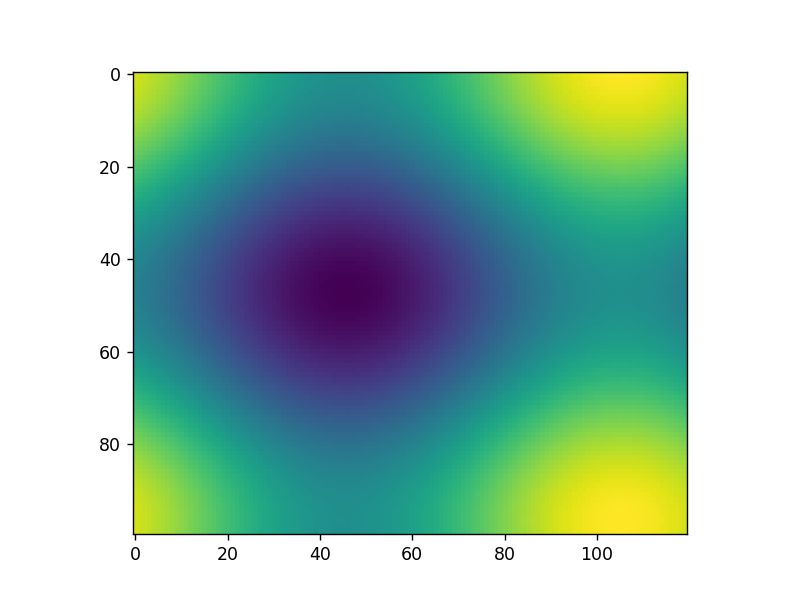

In [20]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

<IPython.core.display.Javascript object>


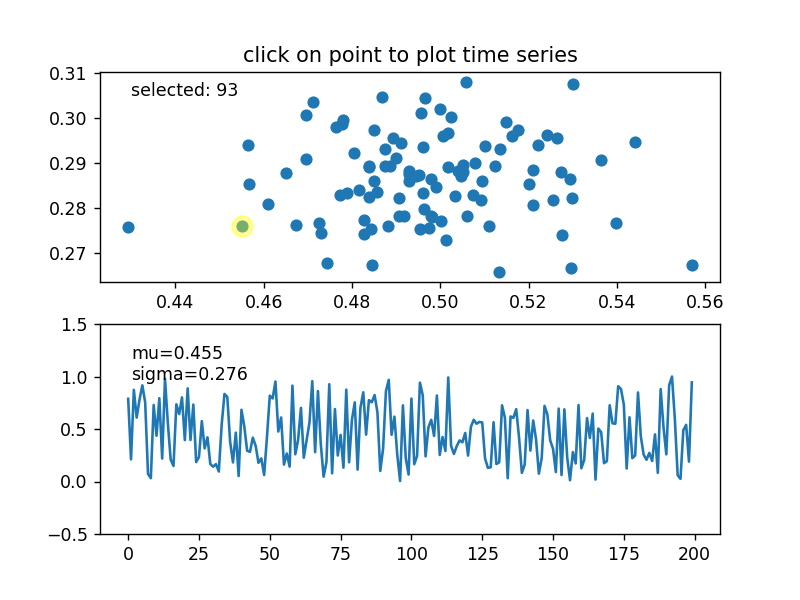

7

In [12]:
%matplotlib notebook

class PointBrowser(object):
    """
    Click on a point to select and highlight it -- the data that
    generated the point will be shown in the lower axes.  Use the 'n'
    and 'p' keys to browse through the next and previous points
    """

    def __init__(self):
        self.lastind = 0

        self.text = ax.text(0.05, 0.95, 'selected: none',
                            transform=ax.transAxes, va='top')
        self.selected, = ax.plot([xs[0]], [ys[0]], 'o', ms=12, alpha=0.4,
                                 color='yellow', visible=False)

    def onpress(self, event):
        if self.lastind is None:
            return
        if event.key not in ('n', 'p'):
            return
        if event.key == 'n':
            inc = 1
        else:
            inc = -1

        self.lastind += inc
        self.lastind = np.clip(self.lastind, 0, len(xs) - 1)
        self.update()

    def onpick(self, event):

        if event.artist != line:
            return True

        N = len(event.ind)
        if not N:
            return True

        # the click locations
        x = event.mouseevent.xdata
        y = event.mouseevent.ydata

        distances = np.hypot(x - xs[event.ind], y - ys[event.ind])
        indmin = distances.argmin()
        dataind = event.ind[indmin]

        self.lastind = dataind
        self.update()

    def update(self):
        if self.lastind is None:
            return

        dataind = self.lastind

        ax2.cla()
        ax2.plot(X[dataind])

        ax2.text(0.05, 0.9, 'mu=%1.3f\nsigma=%1.3f' % (xs[dataind], ys[dataind]),
                 transform=ax2.transAxes, va='top')
        ax2.set_ylim(-0.5, 1.5)
        self.selected.set_visible(True)
        self.selected.set_data(xs[dataind], ys[dataind])

        self.text.set_text('selected: %d' % dataind)
        fig.canvas.draw()


# Fixing random state for reproducibility
np.random.seed(19680801)

X = np.random.rand(100, 200)
xs = np.mean(X, axis=1)
ys = np.std(X, axis=1)

fig, (ax, ax2) = plt.subplots(2, 1)
ax.set_title('click on point to plot time series')
line, = ax.plot(xs, ys, 'o', picker=5)  # 5 points tolerance

browser = PointBrowser()

fig.canvas.mpl_connect('pick_event', browser.onpick)
fig.canvas.mpl_connect('key_press_event', browser.onpress)

<IPython.core.display.Javascript object>


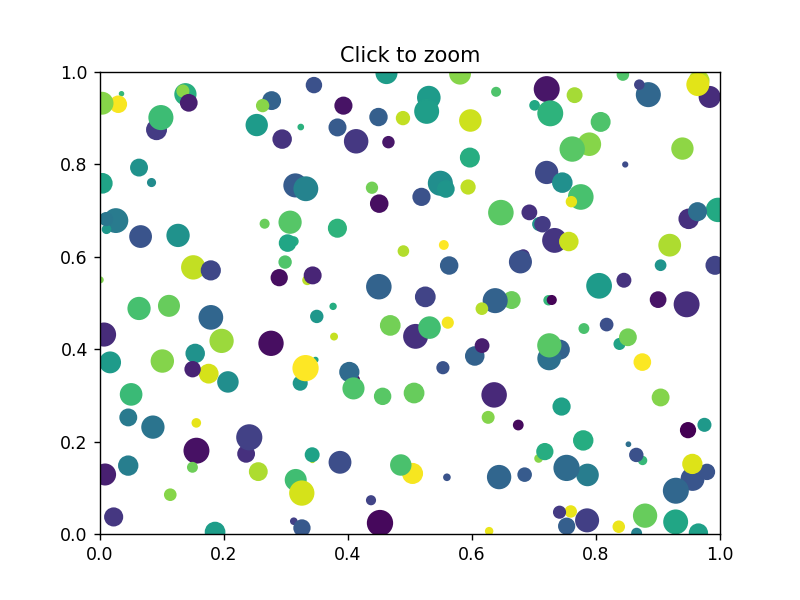

<IPython.core.display.Javascript object>


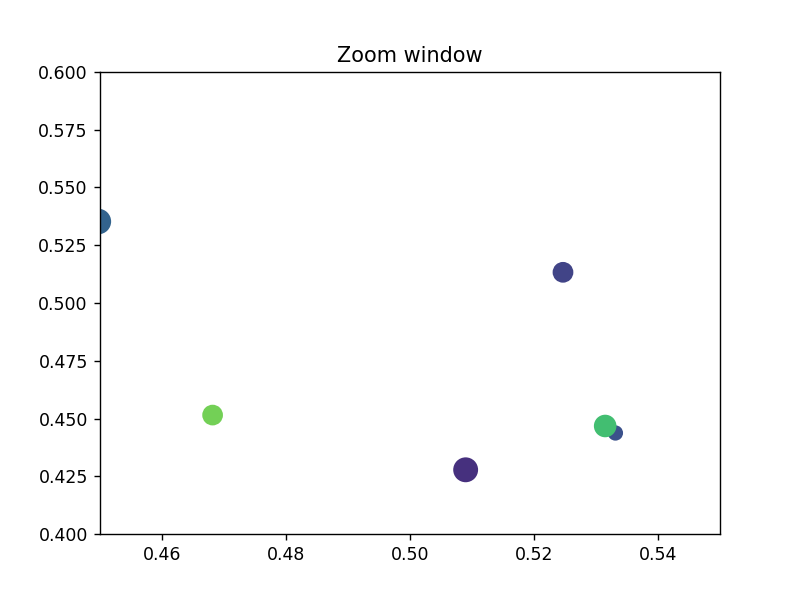

In [14]:
%matplotlib notebook

figsrc, axsrc = plt.subplots()
figzoom, axzoom = plt.subplots()
axsrc.set(xlim=(0, 1), ylim=(0, 1), autoscale_on=False,
          title='Click to zoom')
axzoom.set(xlim=(0.45, 0.55), ylim=(0.4, 0.6), autoscale_on=False,
           title='Zoom window')

x, y, s, c = np.random.rand(4, 200)
s *= 200

axsrc.scatter(x, y, s, c)
axzoom.scatter(x, y, s, c)


def onpress(event):
    if event.button != 1:
        return
    x, y = event.xdata, event.ydata
    axzoom.set_xlim(x - 0.1, x + 0.1)
    axzoom.set_ylim(y - 0.1, y + 0.1)
    figzoom.canvas.draw()

figsrc.canvas.mpl_connect('button_press_event', onpress)
plt.show()

<IPython.core.display.Javascript object>


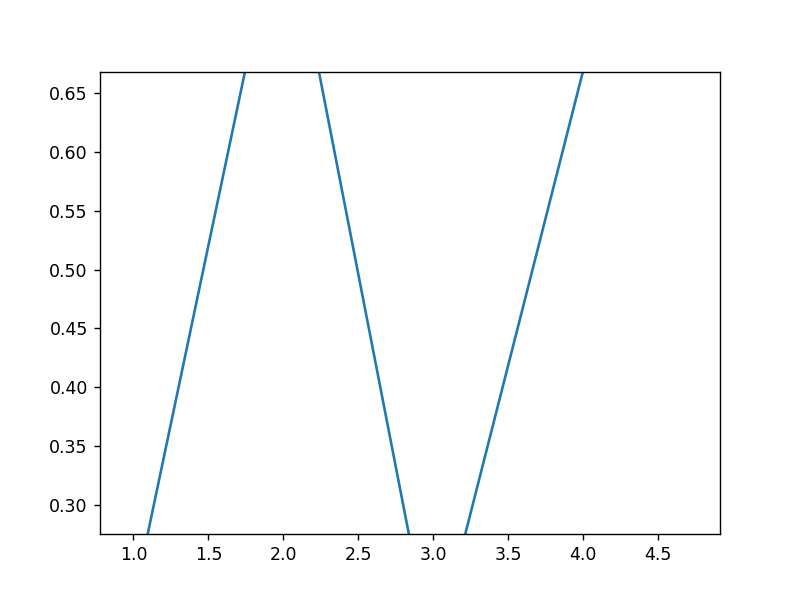

In [16]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.plot(np.random.rand(10))

def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>


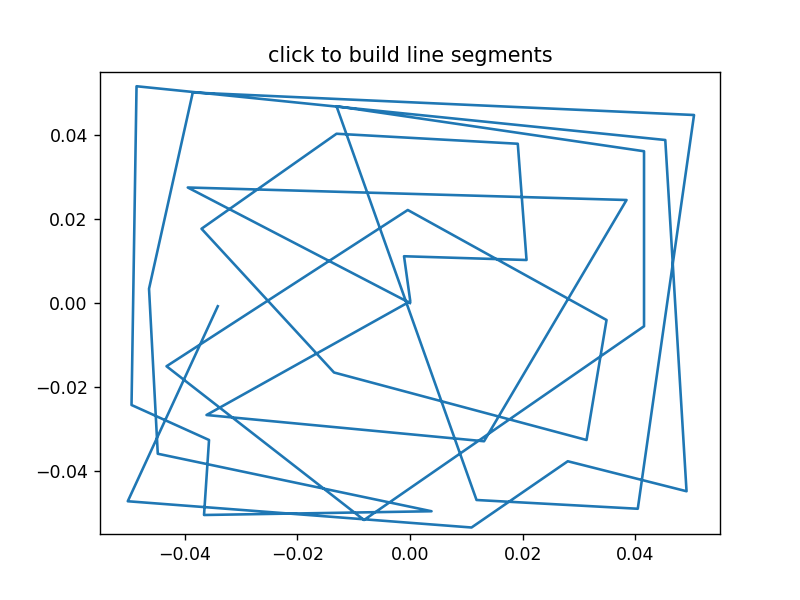

In [11]:
%matplotlib notebook

class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print('click', event)
        if event.inaxes!=self.line.axes: return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('click to build line segments')
line, = ax.plot([0], [0])  # empty line
linebuilder = LineBuilder(line)

# Others: